In [1]:
from google.colab import drive

drive.mount("/content/gdrive")
import pandas as pd
import numpy as  np
# df=pd.read_csv("/content/gdrive/MyDrive/finance dataset/train.csv")
df=pd.read_csv("/content/gdrive/MyDrive/ML in Finance (shared)/train.csv")
df.head(1)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)


Mounted at /content/gdrive


In [2]:

# count frequency count
df['id'].value_counts().value_counts()

6    101169
5     35148
1     29963
2     25870
3     23149
4     22412
Name: id, dtype: int64

### Target Variable setup based on firm year

In [3]:
# check if year in stmt_date is different than in fs_year
df['stmt_date'] = pd.to_datetime(df['stmt_date'])
#fs_year has only year
df['fs_year'] = pd.to_datetime(df['fs_year'], format='%Y').dt.year

#find all the rows where the year in stmt_date is different than in fs_year
print(df[df['stmt_date'].dt.year - df['fs_year']!=0])

df['def_date'] = pd.to_datetime(df['def_date'])

#target variable setup
# based on the assumption that the company has to submit its annual report within 180 days from the end of the fiscal year
df['target'] = np.where(((df['def_date'] - df['stmt_date']).dt.days <= 545) &
                        ((df['def_date'] - df['stmt_date']).dt.days >= 180), 1, 0)


Empty DataFrame
Columns: [Unnamed: 0, id, stmt_date, HQ_city, legal_struct, ateco_sector, def_date, fs_year, asst_intang_fixed, asst_tang_fixed, asst_fixed_fin, asst_current, AR, cash_and_equiv, asst_tot, eqty_tot, eqty_corp_family_tot, liab_lt, liab_lt_emp, debt_bank_st, debt_bank_lt, debt_fin_st, debt_fin_lt, AP_st, AP_lt, debt_st, debt_lt, rev_operating, COGS, prof_operations, goodwill, inc_financing, exp_financing, prof_financing, inc_extraord, taxes, profit, days_rec, ebitda, roa, roe, wc_net, margin_fin, cf_operations]
Index: []


<ipython-input-3-27640e3ed210>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['def_date'] = pd.to_datetime(df['def_date'])


In [ ]:
# # save data later than 2012 for testing
# df_test = df[df['stmt_date'].dt.year >= 2012]
# df_test.to_csv('test.csv', index=False)

In [ ]:
# df_output_prob=pd.read_csv("output.csv")


In [ ]:
# plot_roc_curve(df_test['target'],df_output_prob['0'],TITLE='ROC curve ')

## Data cleaning

### Variables : COGS, Operating Revenue, Profit from operations
COGS (Cost of Goods Sold) for some records was less than or equal to zero. This is not possible as COGS is a cost incurred by the firm to produce the goods. We verified with two other related columns:
Operating Revenue and Profit from operations as,
$$ \text{Profit from operations} = \text{Operating Revenue} - \text{COGS} $$
but they failed to provide any additional information.

Effect: 8300 rows removed from the dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct',
       'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed',
       'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR',
       'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot',
       'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
       'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
       'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'target'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def compareDistOnCutOff(df,primary_column,cutoff,variable,outlier_removal=False):
    df_below_cutoff=df[df[primary_column]<=cutoff].copy()
    df_above_cutoff=df[df[primary_column]>cutoff].copy()
    #remove outliers
    if outlier_removal:
        Q1=df_below_cutoff[primary_column].quantile(0.10)
        Q3=df_below_cutoff[primary_column].quantile(0.90)
        IQR=Q3-Q1
        df_below_cutoff=df_below_cutoff[(df_below_cutoff[primary_column]>=Q1-1.5*IQR) & (df_below_cutoff[primary_column]<=Q3+1.5*IQR)]
        Q1=df_above_cutoff[primary_column].quantile(0.10)
        Q3=df_above_cutoff[primary_column].quantile(0.90)
        IQR=Q3-Q1
        df_above_cutoff=df_above_cutoff[(df_above_cutoff[primary_column]>=Q1-1.5*IQR) & (df_above_cutoff[primary_column]<=Q3+1.5*IQR)]
    #plot distribution
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.histplot((df_below_cutoff[variable])**1/3,ax=ax[0],color="red",bins=100)
    sns.histplot((df_above_cutoff[variable])**1/3,ax=ax[1],color="blue",bins=100)
    ax[0].set_title("Below cutoff")
    ax[1].set_title("Above cutoff")
    plt.show()



In [ ]:
# cols= ['ateco_sector', 'asst_intang_fixed',
#        'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR',
#        'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot',
#        'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
#        'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
#        'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
#        'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
#        'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
#        'target']
# for i in cols:
#     compareDistOnCutOff(df,"COGS",0,i,True)


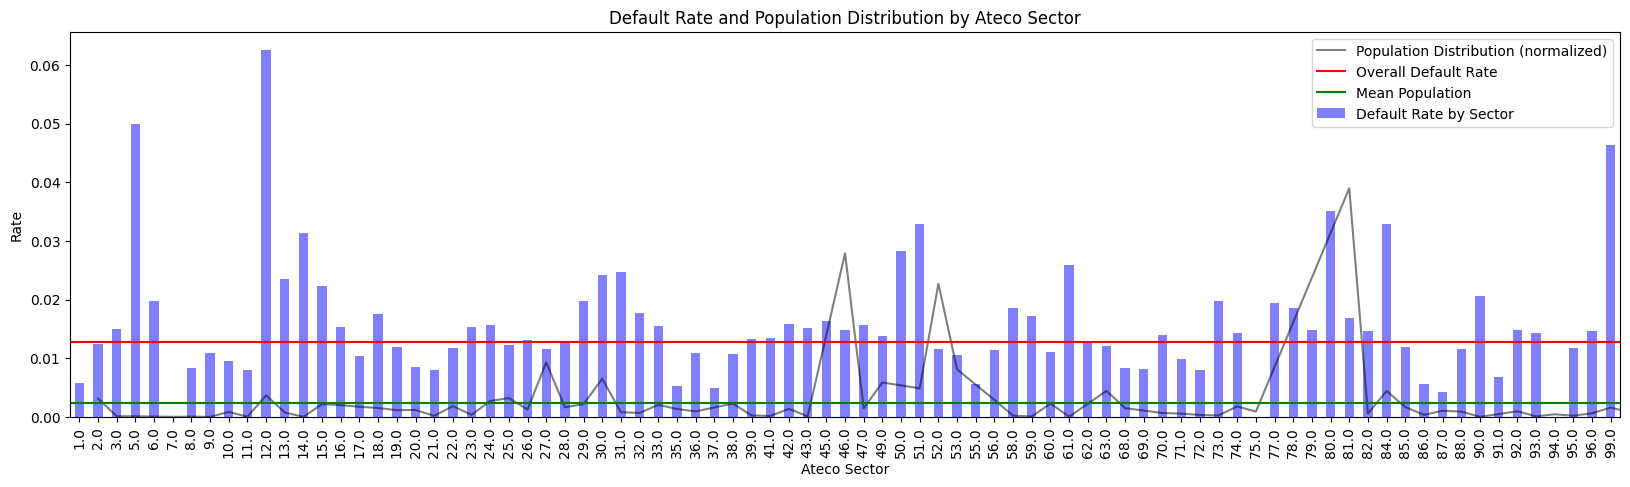

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
df.groupby("ateco_sector")["target"].mean().plot(kind='bar', color='blue', alpha=0.5, label='Default Rate by Sector')



# Calculate the population distribution, normalize it, sort by sector, and plot
# Normalize the value counts to be between 0 and 1 for the purpose of plotting on the same y-axis
population_distribution = df["ateco_sector"].value_counts().sort_index()
normalized_population = population_distribution / population_distribution.sum()/5

# Plot the normalized and sorted population distribution as a line plot
plt.plot(normalized_population.index, normalized_population.values, color='black', alpha=0.5, label='Population Distribution (normalized)')

# Add a horizontal line for the overall default rate
plt.axhline(df["target"].mean(), color='red', label='Overall Default Rate')

plt.axhline(population_distribution.mean()/population_distribution.sum()/5, color='green', label='Mean Population')

# Add labels and legend
plt.xlabel('Ateco Sector')
plt.ylabel('Rate')
plt.legend()
plt.title('Default Rate and Population Distribution by Ateco Sector')

# Show plot
plt.show()


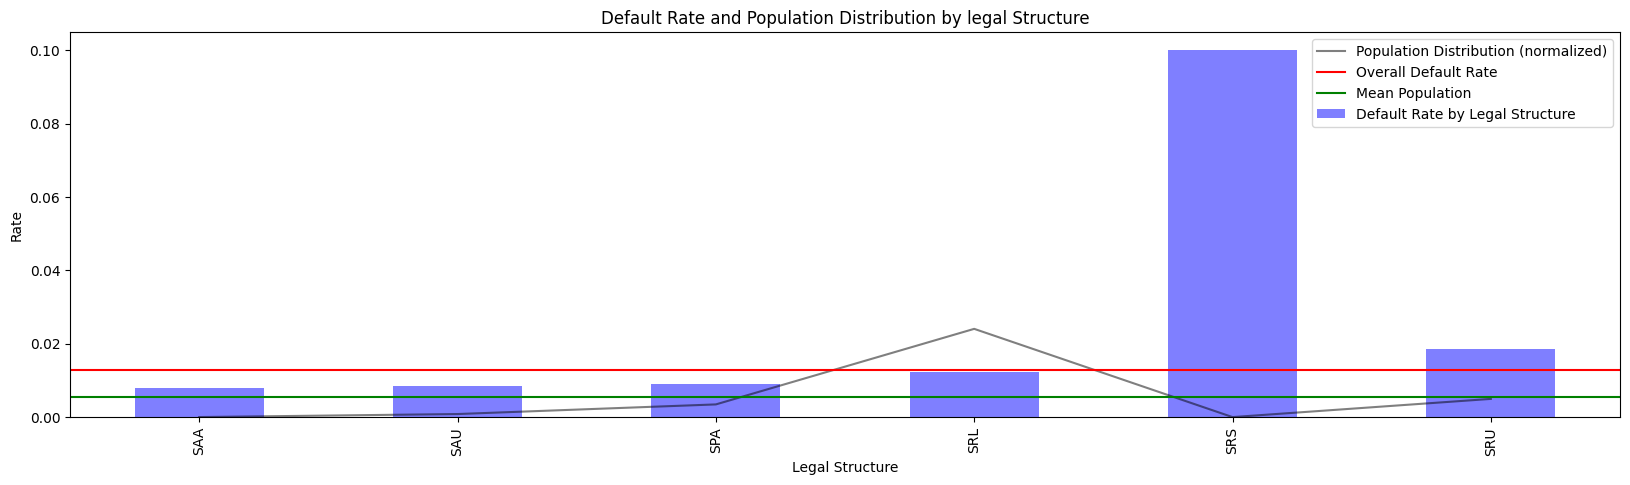

In [7]:
plt.figure(figsize=(20, 5))
df.groupby("legal_struct")["target"].mean().plot(kind='bar', color='blue', alpha=0.5, label='Default Rate by Legal Structure')

# Calculate the population distribution, normalize it, sort by sector, and plot
# Normalize the value counts to be between 0 and 1 for the purpose of plotting on the same y-axis
population_distribution = df["legal_struct"].value_counts().sort_index()
normalized_population = population_distribution / population_distribution.sum()/30

# Plot the normalized and sorted population distribution as a line plot
plt.plot(normalized_population.index, normalized_population.values, color='black', alpha=0.5, label='Population Distribution (normalized)')

# Add a horizontal line for the overall default rate
plt.axhline(df["target"].mean(), color='red', label='Overall Default Rate')

plt.axhline(population_distribution.mean()/population_distribution.sum()/30, color='green', label='Mean Population')

# Add labels and legend
plt.xlabel('Legal Structure')
plt.ylabel('Rate')
plt.legend()
plt.title('Default Rate and Population Distribution by legal Structure')

# Show plot
plt.show()


In [8]:
#operation on df using COGS variable
# df=df[df["COGS"]>0]
df["rev_operating"]=df["rev_operating"].fillna(df["COGS"]+ df["prof_operations"])

### Variables : Net Income, Total Assets, ROA, ROE
The dataset had no information on the Net Income of the firm. Thus we calculated it using the following formula:
$$ \text{ROA} = \frac{\text{Net Income}}{\text{Total Assets}} $$
$$ \text{Net Income} = \text{ROA} \times \text{Total Assets} $$
Since we totally rely on the ROA variable, we will not be able to get net income without it, so we remove the rows with missing ROA values.
This net income is used to calculate the ROE (Return on Equity) as,
$$ \text{ROE} = \frac{\text{Net Income}}{\text{Total Equity}} $$
Effect: approx 6 rows were removed.


In [9]:
#operation on df using roa and asst_tot variable
df.dropna(subset=["roa","asst_tot"],inplace=True)
df['net_income']=df['roa']*df['asst_tot']
df['roe'] = df['roe'].fillna(df['net_income'] / df['eqty_tot'])


### Variables : Net Working Capital, Current Assets, Non-Current Assets, Current Liabilities, Total Liabilities
This variable helps in calculating current liabilites using the following formula:
$$ \text{Net Working Capital} = \text{Current Assets} - \text{Current Liabilities} $$
We find non-current assets using the following formula:
$$ \text{Non-Current Assets} = \text{Total Assets} - \text{Current Assets} $$
for total liabilities we use the following formula:
$$ \text{Total Liabilities} = \text{Total Assets} - \text{Total Equity} $$
We would not be able to calculate the current liabilities without this variable, so we remove the rows with missing Net Working Capital values.

Effect: approx 5 rows were removed.

In [10]:
df.dropna(subset=["wc_net","asst_current"],inplace=True)
df['current_liab']=df['asst_current']-df['wc_net']
df['non_current_assets']=df['asst_tot']-df['asst_current']
df["total_liab"]=df["asst_tot"]-df["eqty_tot"]
df['non_current_liab']=df['total_liab']-df['current_liab']

### Variables : Unnamed: 0, HQ_city, fs_year, eqty_corp_family_tot
These variables are not useful for our analysis, so we remove them.

In [11]:
df.drop(["HQ_city","fs_year",'eqty_corp_family_tot'],axis=1,inplace=True)

### Variables: Cash and equivalents, Cashflow from operations
These are important variables for our analysis but there's no other way to fill the missing values. So we remove the rows with missing values.

Effect: 1000 rows were removed.

In [12]:
df.dropna(subset=["cash_and_equiv","cf_operations"],inplace=True)

### Variables: Fixed Assets, Tangible Fixed Assets, Intangible Fixed Assets, Fixed Financial Assets
We define fixed assets as the sum of tangible fixed assets, intangible fixed assets and fixed financial assets.
$$ \text{Fixed Assets} = \text{Tangible Fixed Assets} + \text{Intangible Fixed Assets} + \text{Fixed Financial Assets} $$

Effect :270 rows were removed.

In [13]:
#drop records with nulls in these columns
df.dropna(subset=["asst_intang_fixed","asst_tang_fixed","asst_fixed_fin"],inplace=True)
df['fixed_assets']=df['asst_intang_fixed']+df['asst_tang_fixed']+df['asst_fixed_fin']
df=df[df['fixed_assets']>=0]

### Variables: Financial Expenses, EBITDA
We need Financial expenses to calculate Time Interest Earned Ratio (TIE) later. Thus we remove the rows with missing values.
We also found that exp_financing has negative values. This is not possible as it is the amount of money spent on financing activities. We remove the rows with negative values.

In [ ]:
# df = df[df['exp_financing'] > 0]

In [14]:
# df[df['stmt_date'].dt.year<=2011].groupby('legal_struct')['target'].mean()*100
df['legal_struct']=df['legal_struct'].map({'SAU':1,'SPA':2,'SAA':3,'SRS':4,'SRL':5,'SRU':6})

In [ ]:
# #target encoding on legal_struct
# df['legal_struct'] = df['legal_struct'].map(df[df['stmt_date'].dt.year<=2011].groupby('legal_struct')['target'].mean()*100)

### Summary

Thus for us the primary variables are:
- COGS
- Operating Revenue
- Profit from operations
- Total Assets
- ROA
- Current Assets
- Cash and equivalents
- Cashflow from operations
- Total Equity
- Tangible Fixed Assets
- Intangible Fixed Assets
- Fixed Financial Assets
- Net Working Capital
- EBIDTA
- Financial Expenses

And we derived the following variables:
- Net Income
- ROE
- Current Liabilities
- Non-Current Assets
- Non-Current Liabilities
- Total Liabilities
- Fixed Assets



## Financial Ratios

### Liquidity Ratios
- Current Ratio
- Cash Ratio
- CFO Ratio


In [15]:
df['current_ratio']=df['asst_current']/df['current_liab'].apply(lambda x :x+1 if x!=-1 else x+0)
df['cash_ratio']=df['cash_and_equiv']/df['debt_st'].apply(lambda x :x+1 if x!=-1 else x+0)
df["CFO_ratio"]=df["cf_operations"]/df["current_liab"].apply(lambda x :x+1 if x!=-1 else x+0)

In [ ]:
# df[df['total_liab']<0] #is negative liablity possible?

### Debt Coverage Ratios
- Cashflow to Debt Ratio
- Debt to Assets Ratio (Leverage Ratio)
- DSCR (Debt Service Coverage Ratio)
- Interest Coverage Ratio
- Asset Coverage Ratio

In [16]:
df["CFO_to_total_liab"]=df["cf_operations"]/df["total_liab"].apply(lambda x :x+1 if x!=-1 else x+0)
df['leverage']=df['total_liab']/df['asst_tot'].apply(lambda x :x+1 if x!=-1 else x+0)
df['dscr']=df['ebitda']/df['current_liab'].apply(lambda x :x+1 if x!=-1 else x+0)
df['interest_coverage_ratio']=df['ebitda']/df['exp_financing'].apply(lambda x :x+1 if x!=-1 else x+0)
df['asset_cov_ratio']=(df['asst_tang_fixed']+df['asst_fixed_fin']-(df['current_liab']-df['debt_st']))/df['total_liab'].apply(lambda x :x+1 if x!=-1 else x+0)

### Profitability Ratios
- ROA
- ROE
- Gross Profit Margin

In [17]:
df["gross_profit_margin"]=df["prof_operations"]/df["rev_operating"].apply(lambda x :x+1 if x!=-1 else x+0)

In [ ]:
# asset_management_bucket=train_df[['roa']]

In [18]:
df['debt_lt'] = df['debt_lt'].fillna(df['total_liab']-df['current_liab'])
df['margin_fin']=df['margin_fin'].fillna(df['eqty_tot']-df['fixed_assets'])

In [19]:
df['lt_liab']=df['total_liab']-df['current_liab']

In [20]:
df.columns

Index(['Unnamed: 0', 'id', 'stmt_date', 'legal_struct', 'ateco_sector',
       'def_date', 'asst_intang_fixed', 'asst_tang_fixed', 'asst_fixed_fin',
       'asst_current', 'AR', 'cash_and_equiv', 'asst_tot', 'eqty_tot',
       'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st',
       'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating',
       'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing',
       'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations',
       'target', 'net_income', 'current_liab', 'non_current_assets',
       'total_liab', 'non_current_liab', 'fixed_assets', 'current_ratio',
       'cash_ratio', 'CFO_ratio', 'CFO_to_total_liab', 'leverage', 'dscr',
       'interest_coverage_ratio', 'asset_cov_ratio', 'gross_profit_margin',
       'lt_liab'],
      dtype='object')

In [21]:
filtered_df=df[['stmt_date','legal_struct','asst_current', 'AR','cash_and_equiv', 'asst_tot', 'non_current_assets','eqty_tot',
              'debt_st', 'lt_liab', 'current_liab', 'total_liab','non_current_liab',
              'rev_operating', 'COGS', 'prof_operations',
              'goodwill', 'taxes', 'profit','exp_financing',
              'ebitda', 'wc_net', 'margin_fin', 'cf_operations','net_income',
              'current_ratio','cash_ratio', 'CFO_ratio',
              'CFO_to_total_liab','leverage', 'dscr', 'interest_coverage_ratio', 'asset_cov_ratio',
              'gross_profit_margin','fixed_assets','roa','roe',
              'target']]

In [22]:
filtered_df.head(1)

,stmt_date,legal_struct,asst_current,AR,cash_and_equiv,asst_tot,non_current_assets,eqty_tot,debt_st,lt_liab,current_liab,total_liab,non_current_liab,rev_operating,COGS,prof_operations,goodwill,taxes,profit,exp_financing,ebitda,wc_net,margin_fin,cf_operations,net_income,current_ratio,cash_ratio,CFO_ratio,CFO_to_total_liab,leverage,dscr,interest_coverage_ratio,asset_cov_ratio,gross_profit_margin,fixed_assets,roa,roe,target
0,2011-12-31,5,733496.00,283013.00,2083.00,1946940.00,1213444.00,289982.00,237238.00,1419720.00,237238.00,1656958.00,1419720.00,538081.00,612202.00,-74121.00,157436.00,-80959.00,-81288.00,15550.00,6318.00,496258.00,-917029.00,-849.00,-7417841.40,3.09,0.01,-0.00,-0.00,0.85,0.03,0.41,0.69,-0.14,1207011.00,-3.81,-28.03,0


In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)


### Outlier detection and removal

In [24]:
df_cleaned = filtered_df.copy()

# Remove outliers for each column
for column in df_cleaned:
    if column == 'stmt_date':
        continue
    if column == 'target':
        continue
    if column == 'legal_struct':
        continue
    Q1 = df_cleaned[column].quantile(0.03)
    Q3 = df_cleaned[column].quantile(0.97)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]




In [25]:
#defaulting firms
df_cleaned[df_cleaned['target']==1].shape

(9242, 38)

In [26]:
#non-defaulting firms
df_cleaned[df_cleaned['target']==0].shape

(814687, 38)

In [27]:
df_cleaned.describe()

,legal_struct,asst_current,AR,cash_and_equiv,asst_tot,non_current_assets,eqty_tot,debt_st,lt_liab,current_liab,total_liab,non_current_liab,rev_operating,COGS,prof_operations,goodwill,taxes,profit,exp_financing,ebitda,wc_net,margin_fin,cf_operations,net_income,current_ratio,cash_ratio,CFO_ratio,CFO_to_total_liab,leverage,dscr,interest_coverage_ratio,asset_cov_ratio,gross_profit_margin,fixed_assets,roa,roe,target
count,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00
mean,4.80,3163151.58,1642791.71,225311.60,5181841.37,2018689.79,1403542.22,2477444.92,1300854.23,2477444.92,3778299.15,1300854.23,4063225.21,3902654.07,160571.13,839699.00,105595.24,38776.45,76652.92,285011.35,685706.66,-551168.96,163216.94,16057123.75,2.05,0.18,0.12,0.06,0.75,0.21,62.13,0.66,0.03,1954706.39,3.39,3.67,0.01
std,1.07,3654964.93,2346843.95,483772.56,5032784.82,3041584.69,2248154.68,2971584.55,1889408.97,2971584.55,3806128.48,1889408.97,5818154.53,5673040.38,369274.65,1174977.56,370810.08,276635.87,107547.75,457802.53,1981467.16,2152051.73,351551.28,36927439.17,3.88,0.45,0.31,0.13,0.23,0.40,445.72,1.16,0.53,3004883.03,6.72,45.46,0.11
min,1.00,0.00,-2782518.00,-2844511.00,1500002.00,-1097806.00,-10018811.00,-13041155.00,-7556800.00,-13041155.00,-3071235.00,-7556800.00,-17231245.00,-17157785.00,-2490199.00,-6285786.00,-2907781.00,-2248232.00,-473788.00,-2392688.00,-13969428.00,-18626490.00,-2242259.00,-249048660.56,-38.18,-3.51,-2.63,-0.94,-0.40,-2.55,-4553.00,-6.08,-9.86,0.00,-48.50,-411.77,0.00
25%,5.00,1140373.00,279281.00,5731.00,2127430.00,242705.00,173385.00,817159.00,226527.00,817159.00,1596746.00,226527.00,658153.00,592560.00,19125.00,147362.00,-2348.00,-15397.00,13549.00,59042.00,-112508.00,-1070240.00,14111.00,1912124.30,0.92,0.00,0.01,0.01,0.61,0.04,1.34,0.05,0.01,204339.00,0.60,-1.68,0.00
50%,5.00,2005374.00,920047.00,43485.00,3275500.00,986370.00,624807.00,1554926.00,663199.00,1554926.00,2433375.00,663199.00,2173972.00,2065510.00,90252.00,460849.00,43782.00,11979.00,41490.00,160330.00,334505.00,-156326.00,79324.00,9025507.20,1.20,0.03,0.05,0.03,0.82,0.10,3.35,0.29,0.04,917569.00,2.70,2.89,0.00
75%,5.00,3747150.00,1947196.00,218424.00,6037528.00,2384500.00,1622639.00,2898709.00,1554856.00,2898709.00,4413523.00,1554856.00,4812725.00,4616013.00,223735.00,1029655.00,151015.00,74390.00,92371.00,359614.00,1164755.00,256423.00,216834.00,22375068.56,1.84,0.15,0.15,0.08,0.94,0.24,10.84,0.83,0.11,2308915.00,5.38,14.25,0.00
max,6.00,45220015.00,28827861.00,5228016.00,60345999.00,30695828.00,24003154.00,30011666.00,18094918.00,30011666.00,40747006.00,18094918.00,53248142.00,50733515.00,3146874.00,10462671.00,3439129.00,2440404.00,948092.00,4071494.00,17219672.00,15679899.00,3099247.00,314698440.53,66.38,5.85,3.68,1.30,2.29,3.75,7419.94,11.66,6.91,25896711.00,58.01,384.71,1.00


## Data Transformation

In [28]:
target_columns=['gross_profit_margin','legal_struct','CFO_to_total_liab', 'CFO_ratio', 'asset_cov_ratio', 'dscr',
       'interest_coverage_ratio', 'current_ratio', 'leverage', 'cash_ratio','roa','roe','fixed_assets']

In [29]:
X=df_cleaned[target_columns]

In [30]:
X.isna().sum()

gross_profit_margin        0
legal_struct               0
CFO_to_total_liab          0
CFO_ratio                  0
asset_cov_ratio            0
dscr                       0
interest_coverage_ratio    0
current_ratio              0
leverage                   0
cash_ratio                 0
roa                        0
roe                        0
fixed_assets               0
dtype: int64

In [31]:
#check kurtosis and skewness of the different variables
from scipy.stats import kurtosis
from scipy.stats import skew
for i in target_columns:
    if i=="legal_struct":
        continue
    print("kurtosis: ",kurtosis(df_cleaned[i]))
    print("skewness: ",skew(df_cleaned[i]))
    print("")

kurtosis:  112.54200551429902
skewness:  -7.670847584208626

kurtosis:  18.43804127968218
skewness:  2.854051128007434

kurtosis:  21.935273338203025
skewness:  2.80768202054867

kurtosis:  26.293769899088293
skewness:  4.434378481674139

kurtosis:  18.98585776323503
skewness:  3.402708672846032

kurtosis:  110.2277849821646
skewness:  8.291031384248539

kurtosis:  88.75162694924056
skewness:  8.203861417622866

kurtosis:  0.27281306366308256
skewness:  -0.8620748683861802

kurtosis:  42.95665034838985
skewness:  5.641609511720941

kurtosis:  10.288301689381978
skewness:  0.7798677055952017

kurtosis:  21.739797333140128
skewness:  -1.286201173985619

kurtosis:  13.663981543710438
skewness:  3.2495467159592835



In [32]:
df_cleaned

,stmt_date,legal_struct,asst_current,AR,cash_and_equiv,asst_tot,non_current_assets,eqty_tot,debt_st,lt_liab,current_liab,total_liab,non_current_liab,rev_operating,COGS,prof_operations,goodwill,taxes,profit,exp_financing,ebitda,wc_net,margin_fin,cf_operations,net_income,current_ratio,cash_ratio,CFO_ratio,CFO_to_total_liab,leverage,dscr,interest_coverage_ratio,asset_cov_ratio,gross_profit_margin,fixed_assets,roa,roe,target
0,2011-12-31,5,733496.00,283013.00,2083.00,1946940.00,1213444.00,289982.00,237238.00,1419720.00,237238.00,1656958.00,1419720.00,538081.00,612202.00,-74121.00,157436.00,-80959.00,-81288.00,15550.00,6318.00,496258.00,-917029.00,-849.00,-7417841.40,3.09,0.01,-0.00,-0.00,0.85,0.03,0.41,0.69,-0.14,1207011.00,-3.81,-28.03,0
1,2008-12-31,5,622992.00,387653.00,5339.00,2077346.00,1454354.00,-37325.00,525040.00,1589631.00,525040.00,2114671.00,1589631.00,967389.00,1024802.00,-57413.00,253845.00,-94622.00,-107382.00,49758.00,46088.00,97952.00,-1476039.00,-3881.00,-5733474.96,1.19,0.01,-0.01,-0.00,1.02,0.09,0.93,0.56,-0.06,1438714.00,-2.76,153.61,0
2,2009-12-31,5,615252.00,388260.00,10492.00,1975874.00,1360622.00,-45139.00,825923.00,1195090.00,825923.00,2021013.00,1195090.00,638687.00,681513.00,-42826.00,238817.00,-74235.00,-77819.00,35239.00,67611.00,-210671.00,-1392059.00,32618.00,-4287646.58,0.74,0.01,0.04,0.02,1.02,0.08,1.92,0.57,-0.07,1346920.00,-2.17,94.99,0
4,2007-12-31,5,484753.00,455224.00,14279.00,1769122.00,1284369.00,70060.00,801760.00,897302.00,801760.00,1699062.00,897302.00,2041155.00,1931401.00,109754.00,363557.00,92192.00,36733.00,13569.00,153060.00,-317007.00,-1184970.00,80039.00,10968556.40,0.60,0.02,0.10,0.05,0.96,0.19,11.28,0.66,0.05,1255030.00,6.20,52.43,0
5,2010-12-31,5,609723.00,280395.00,6528.00,1897604.00,1287881.00,371269.00,210967.00,1315368.00,210967.00,1526335.00,1315368.00,564622.00,642138.00,-77516.00,164637.00,-82781.00,-83593.00,15697.00,3973.00,398756.00,-897381.00,-2104.00,-7742224.32,2.89,0.03,-0.01,-0.00,0.80,0.02,0.25,0.75,-0.14,1268650.00,-4.08,-22.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023544,2010-12-31,2,5482319.00,5479300.00,3019.00,8096924.00,2614605.00,885565.00,4814996.00,2396363.00,4814996.00,7211359.00,2396363.00,19215385.00,19302918.00,-87533.00,8229718.00,-51404.00,-341940.00,73646.00,792663.00,667323.00,-1328634.00,538256.00,-8744677.92,1.14,0.00,0.11,0.07,0.89,0.16,10.76,0.06,-0.00,2214199.00,-1.08,-38.61,0
1023546,2009-12-31,2,2169787.00,2168560.00,1227.00,5108231.00,2938444.00,642506.00,2496286.00,1969439.00,2496286.00,4465725.00,1969439.00,19223446.00,18915570.00,307876.00,6935629.00,403886.00,3506.00,152409.00,1238478.00,-326499.00,-1898828.00,934108.00,30802632.93,0.87,0.00,0.37,0.21,0.87,0.50,8.13,0.10,0.02,2541334.00,6.03,0.55,0
1023547,2011-12-31,2,5344865.00,5344243.00,622.00,7648851.00,2303986.00,624227.00,5140176.00,1884448.00,5140176.00,7024624.00,1884448.00,20466171.00,20300804.00,165367.00,7885956.00,85977.00,-268445.00,78684.00,984567.00,204689.00,-1286111.00,550755.00,16521518.16,1.04,0.00,0.11,0.08,0.92,0.19,12.51,0.06,0.01,1910338.00,2.16,-43.00,0
1023548,2008-12-31,2,2955420.00,2955276.00,144.00,6223862.00,3268442.00,639000.00,3427755.00,2157107.00,3427755.00,5584862.00,2157107.00,17438634.00,16631430.00,807204.00,5408857.00,356795.00,6467.00,211575.00,1746442.00,-472335.00,-2212557.00,945705.00,80723490.14,0.86,0.00,0.28,0.17,0.90,0.51,8.25,0.07,0.05,2851557.00,12.97,1.01,0


In [33]:
df_cleaned[target_columns].describe()

,gross_profit_margin,legal_struct,CFO_to_total_liab,CFO_ratio,asset_cov_ratio,dscr,interest_coverage_ratio,current_ratio,leverage,cash_ratio,roa,roe,fixed_assets
count,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00,823929.00
mean,0.03,4.80,0.06,0.12,0.66,0.21,62.13,2.05,0.75,0.18,3.39,3.67,1954706.39
std,0.53,1.07,0.13,0.31,1.16,0.40,445.72,3.88,0.23,0.45,6.72,45.46,3004883.03
min,-9.86,1.00,-0.94,-2.63,-6.08,-2.55,-4553.00,-38.18,-0.40,-3.51,-48.50,-411.77,0.00
25%,0.01,5.00,0.01,0.01,0.05,0.04,1.34,0.92,0.61,0.00,0.60,-1.68,204339.00
50%,0.04,5.00,0.03,0.05,0.29,0.10,3.35,1.20,0.82,0.03,2.70,2.89,917569.00
75%,0.11,5.00,0.08,0.15,0.83,0.24,10.84,1.84,0.94,0.15,5.38,14.25,2308915.00
max,6.91,6.00,1.30,3.68,11.66,3.75,7419.94,66.38,2.29,5.85,58.01,384.71,25896711.00


<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


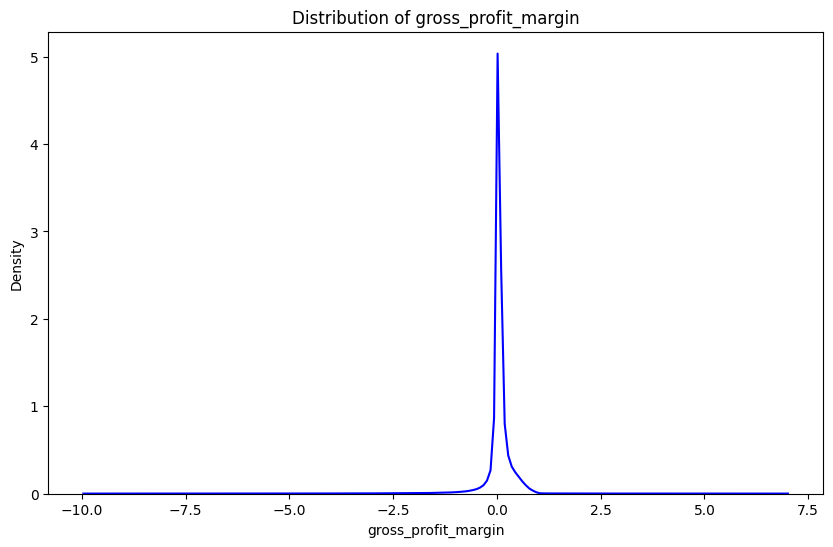

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


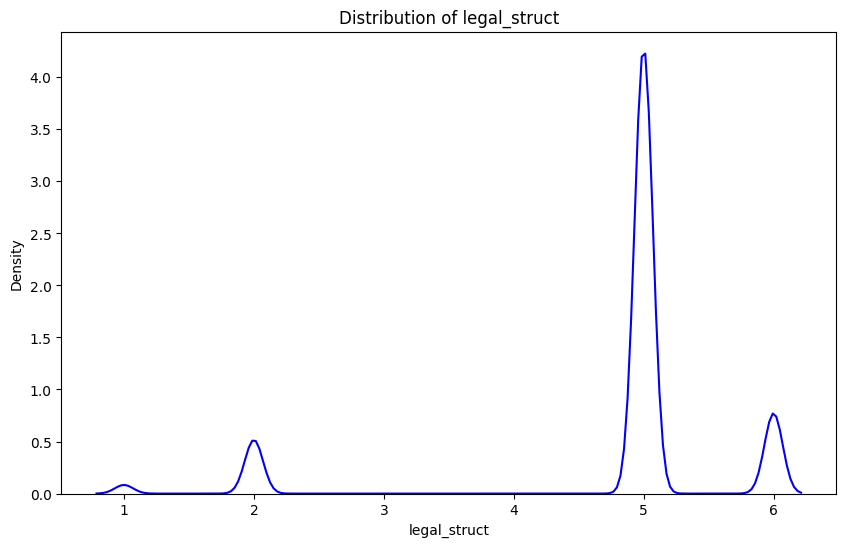

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


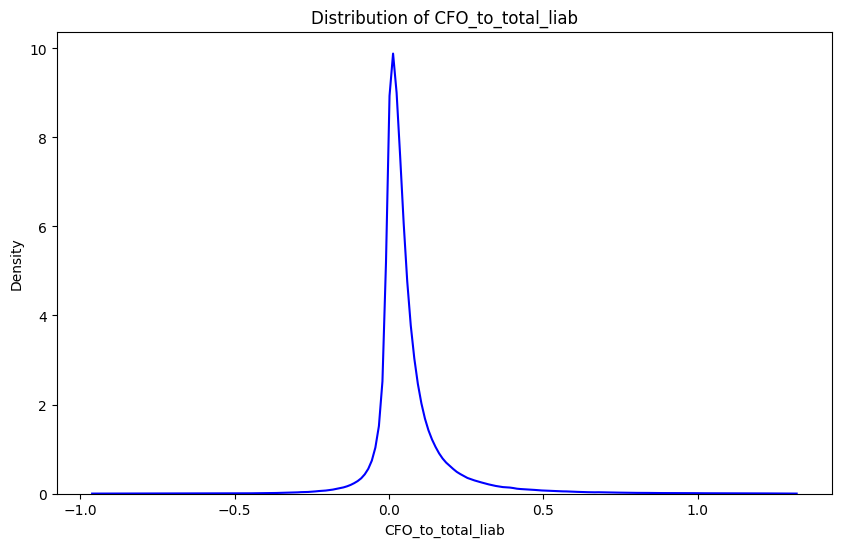

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


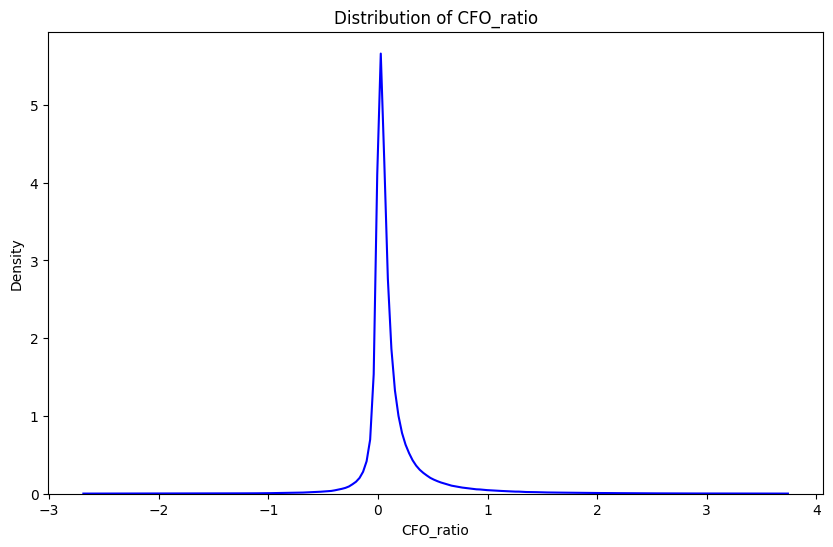

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


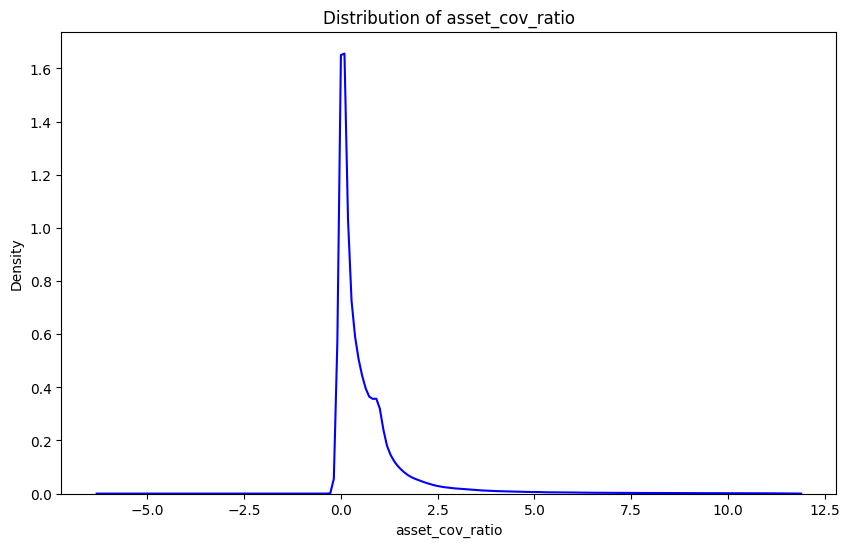

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


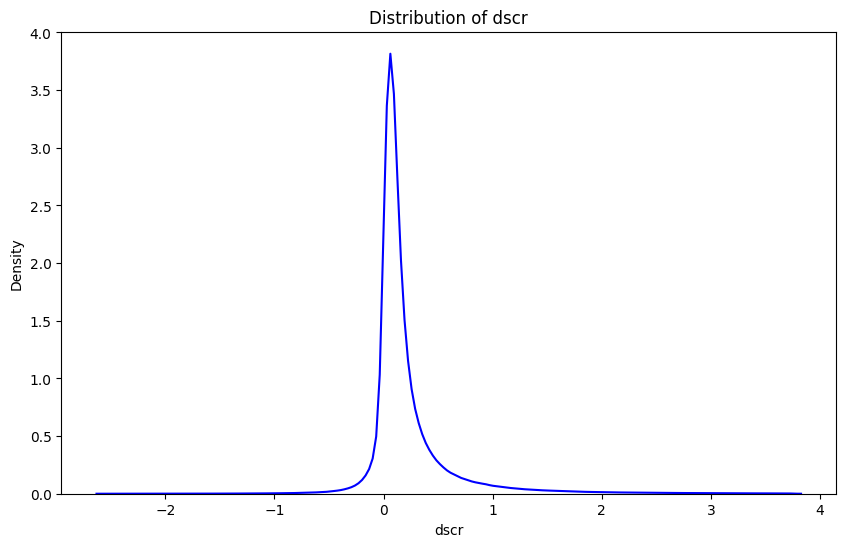

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


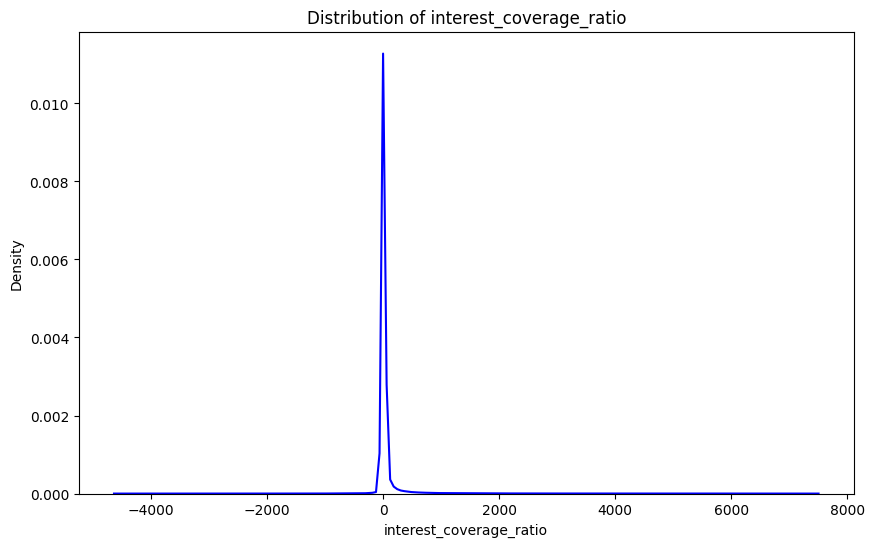

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


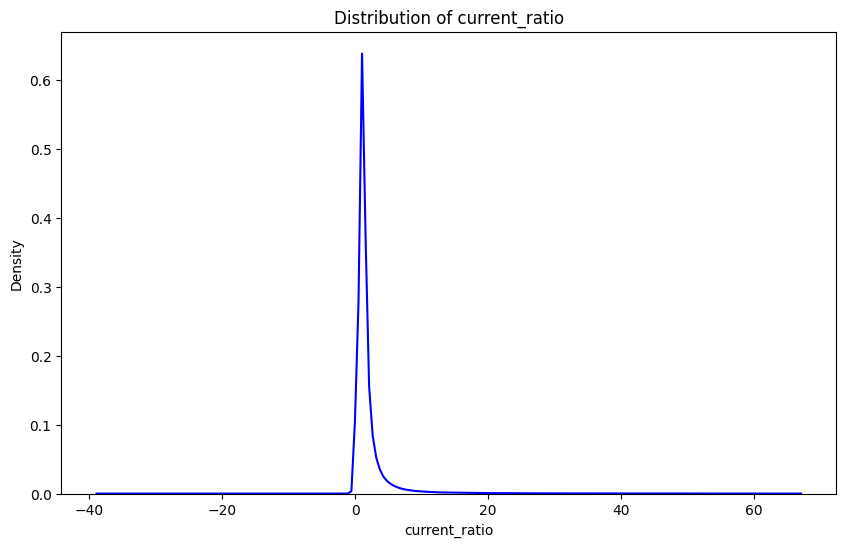

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


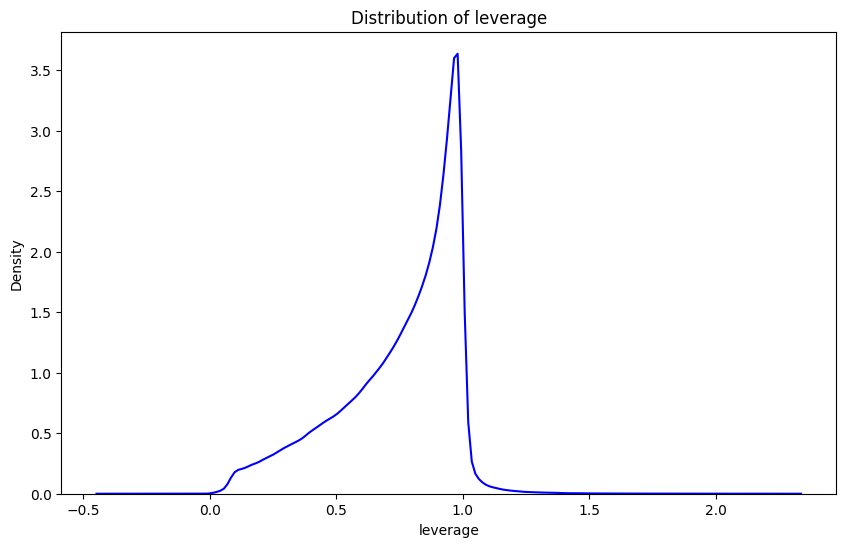

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


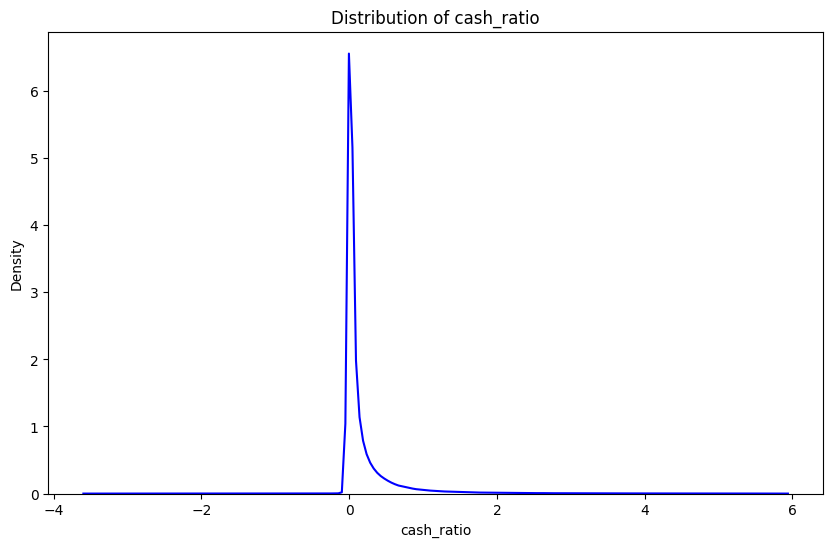

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


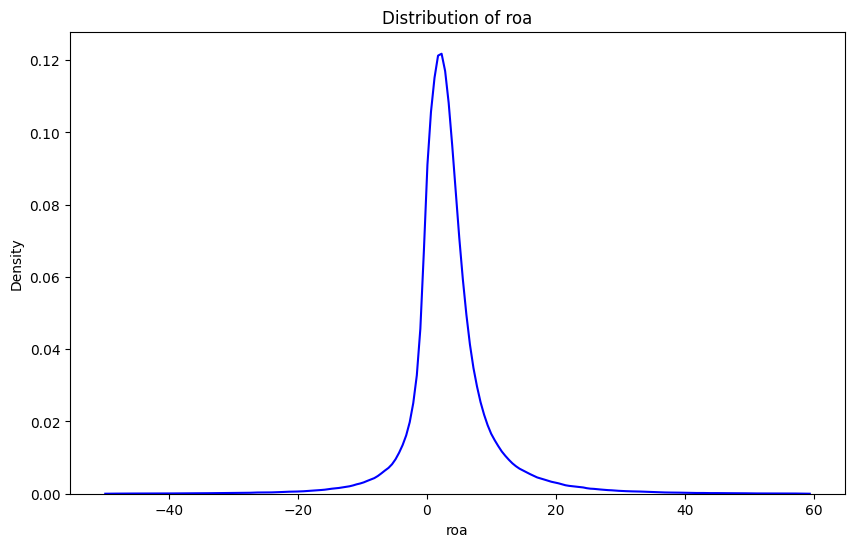

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


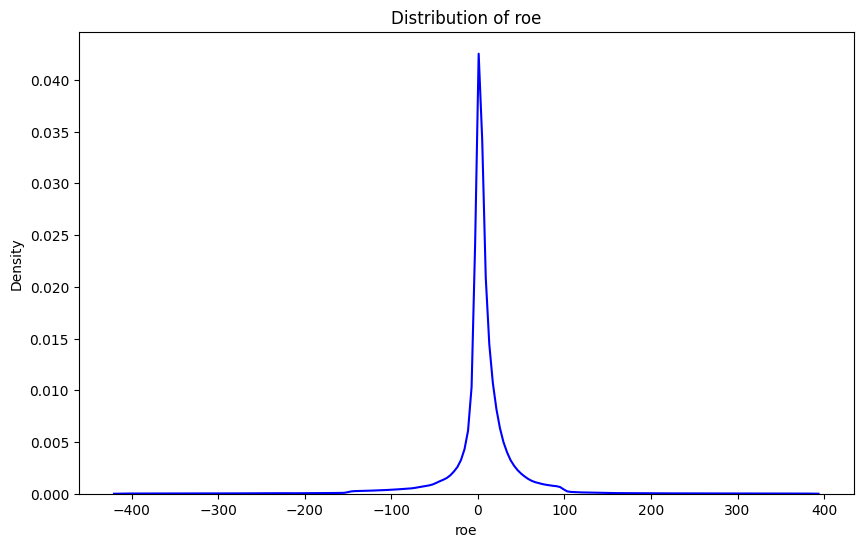

<ipython-input-34-4010df326590>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)


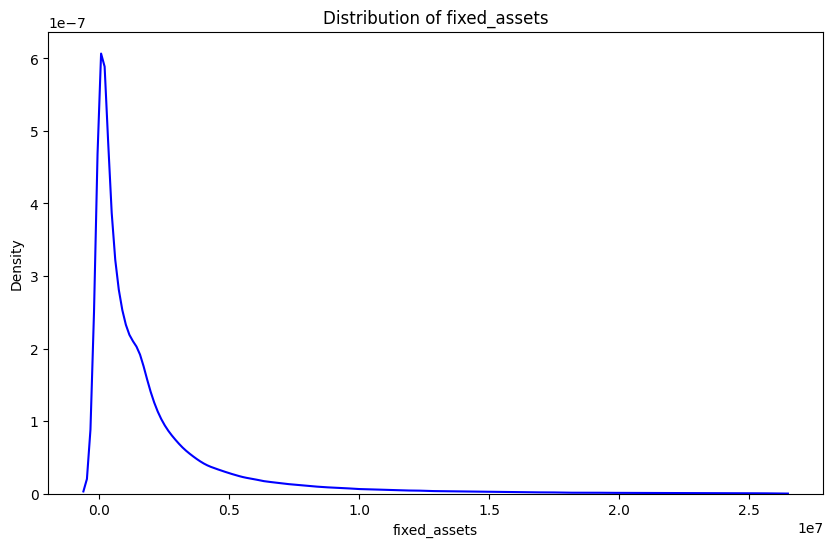

In [34]:
#plot distribution of the different variables
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distribution(df,variable):
    plt.figure(figsize=(10, 6))
    sns.distplot(df[variable], color='blue', hist=False, label='Distribution of '+variable)
    plt.title('Distribution of '+variable)
    plt.show()

for i in target_columns:
    plot_distribution(df_cleaned,i)


<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


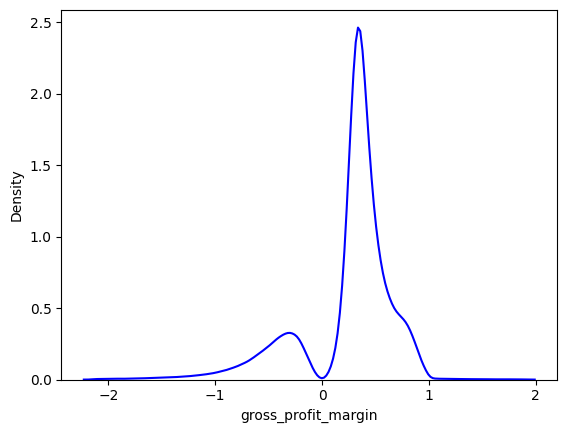

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


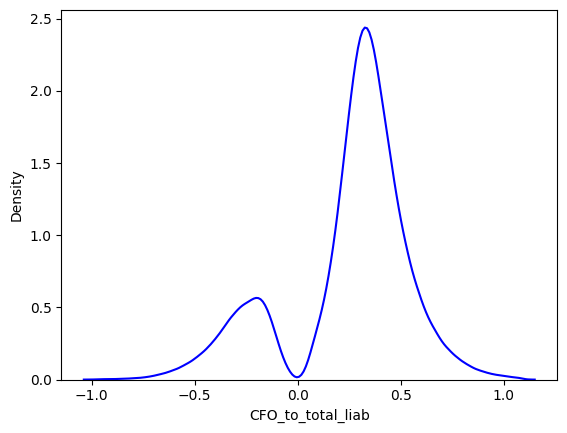

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


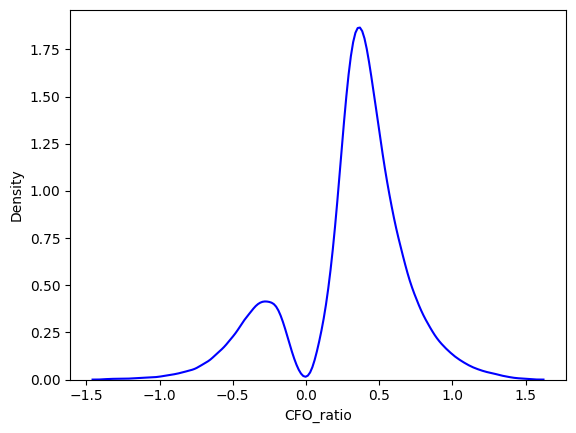

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


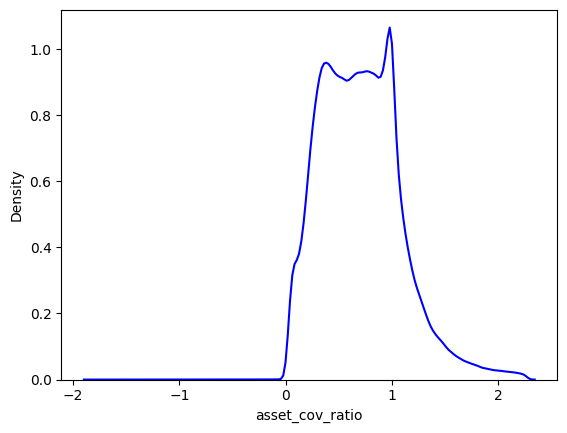

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


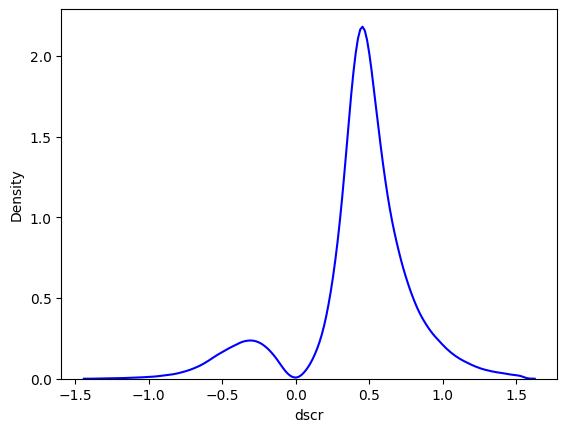

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


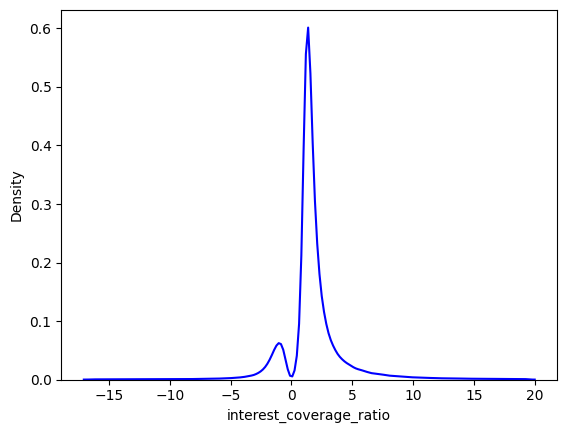

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


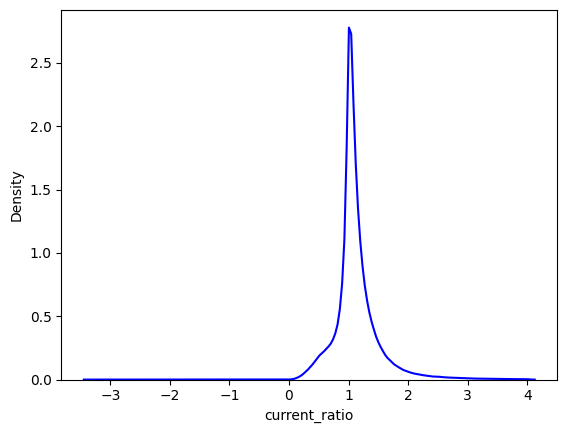

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


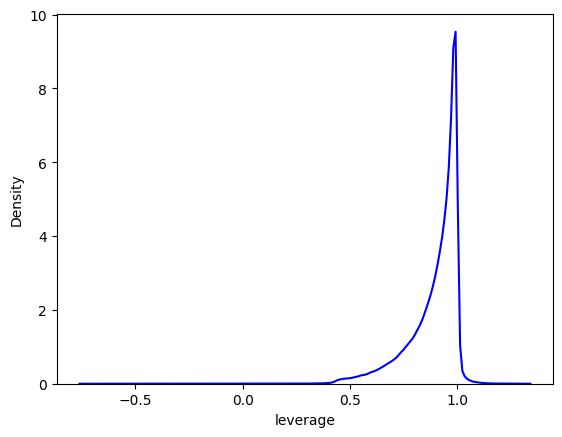

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


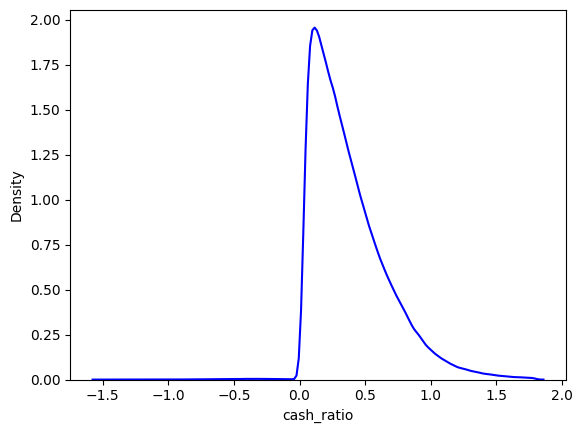

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


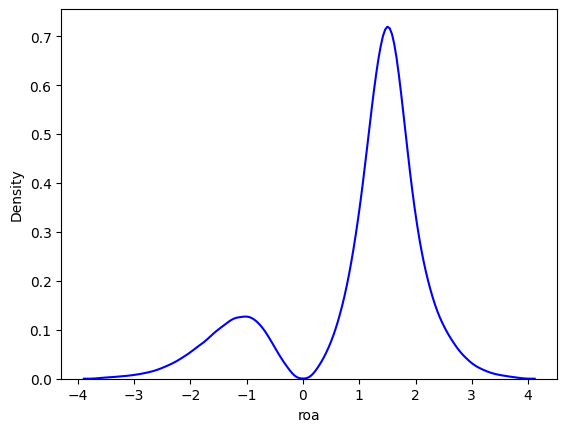

<ipython-input-35-ef68b07cfa7d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[i], color='blue', hist=False)


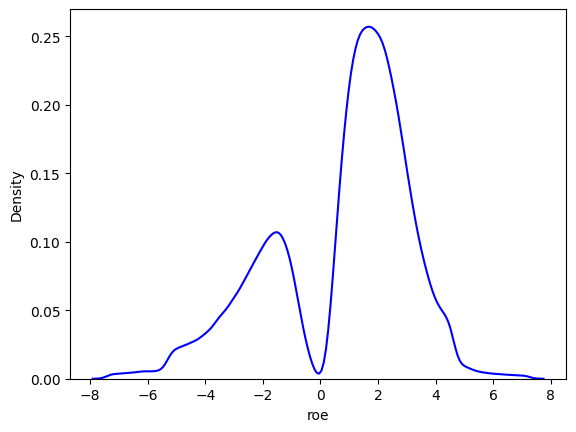

In [35]:
#apply log transformation to the variables
# from sklearn.preprocessing import StandardScaler
# scalers=[]

for i in target_columns:
    if i=="legal_struct":
        continue
    if i=="fixed_assets":
        continue
    temp=abs(df_cleaned[i])**(1/3)
    #assign sign to the variable
    temp=temp*df_cleaned[i]/abs(df_cleaned[i])
    df_cleaned[i]=temp
    # df_cleaned.dropna(subset=[i],inplace=True)
    # #apply standardization
    # scaler = StandardScaler()
    # df_cleaned[i] = scaler.fit_transform(df_cleaned[i].values.reshape(-1,1))
    # scalers.append(scaler)
    sns.distplot(df_cleaned[i], color='blue', hist=False)
    plt.show()

In [36]:
X.isna().sum()

gross_profit_margin        0
legal_struct               0
CFO_to_total_liab          0
CFO_ratio                  0
asset_cov_ratio            0
dscr                       0
interest_coverage_ratio    0
current_ratio              0
leverage                   0
cash_ratio                 0
roa                        0
roe                        0
fixed_assets               0
dtype: int64

In [37]:
X=df_cleaned[target_columns]
y=df_cleaned['target']
X.isna().sum()

gross_profit_margin          382
legal_struct                   0
CFO_to_total_liab            625
CFO_ratio                    625
asset_cov_ratio            35976
dscr                         370
interest_coverage_ratio      370
current_ratio                 51
leverage                       0
cash_ratio                  8328
roa                         1355
roe                         1986
fixed_assets                   0
dtype: int64

In [38]:
from sklearn.feature_selection import mutual_info_classif
def univariate_analysis(df,target_columns):
    new_df=df.copy()
    scores={}
    new_df.dropna(subset=target_columns,inplace=True)
    y=new_df['target']
    X=new_df[target_columns]

    for i in range(len(target_columns)):
        x=X.iloc[:,i]
        x=np.array(x).reshape(-1,1)
        scores[target_columns[i]]=mutual_info_classif(x, y)
    return scores

In [39]:
univariate_analysis(df_cleaned,target_columns)

{'gross_profit_margin': array([0.0027987]),
 'legal_struct': array([0.11598766]),
 'CFO_to_total_liab': array([0.00537544]),
 'CFO_ratio': array([0.00481046]),
 'asset_cov_ratio': array([0.00156317]),
 'dscr': array([0.00477498]),
 'interest_coverage_ratio': array([0.00384813]),
 'current_ratio': array([0.00104711]),
 'leverage': array([0.00553432]),
 'cash_ratio': array([0.00077558]),
 'roa': array([0.00436066]),
 'roe': array([0.004677]),
 'fixed_assets': array([0.00066452])}

In [40]:
#check how many years of data we have
df_cleaned['stmt_date'].dt.year.value_counts()

2011    148330
2012    147299
2010    140631
2009    137830
2008    130253
2007    119586
Name: stmt_date, dtype: int64

## Buckets

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
def vif_analysis(bucket):
    bucket = bucket.dropna()
    bucket = bucket.replace([np.inf, -np.inf], np.nan).dropna()
    correlation_matrix = bucket.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
    vif = pd.DataFrame()
    vif["variables"] = bucket.columns
    vif["VIF"] = [variance_inflation_factor(bucket.values, i) for i in range(bucket.shape[1])]
    return(vif)


### Liquidity Ratios bucket

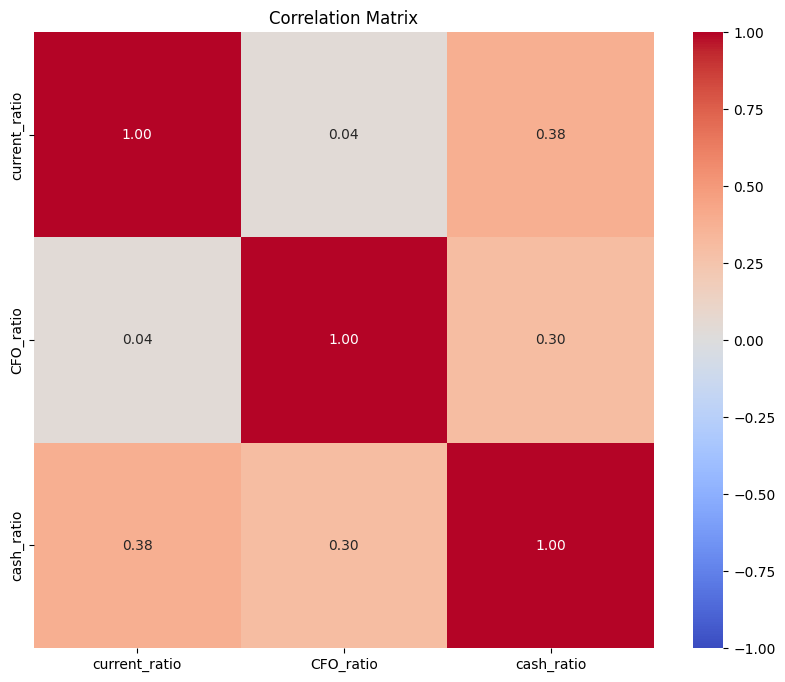

,variables,VIF
0,current_ratio,3.26
1,CFO_ratio,1.71
2,cash_ratio,3.54


In [42]:
liquidity_bucket=df_cleaned[['current_ratio','CFO_ratio',"cash_ratio"]]
vif_analysis(liquidity_bucket)

### Debt Coverage Ratios bucket

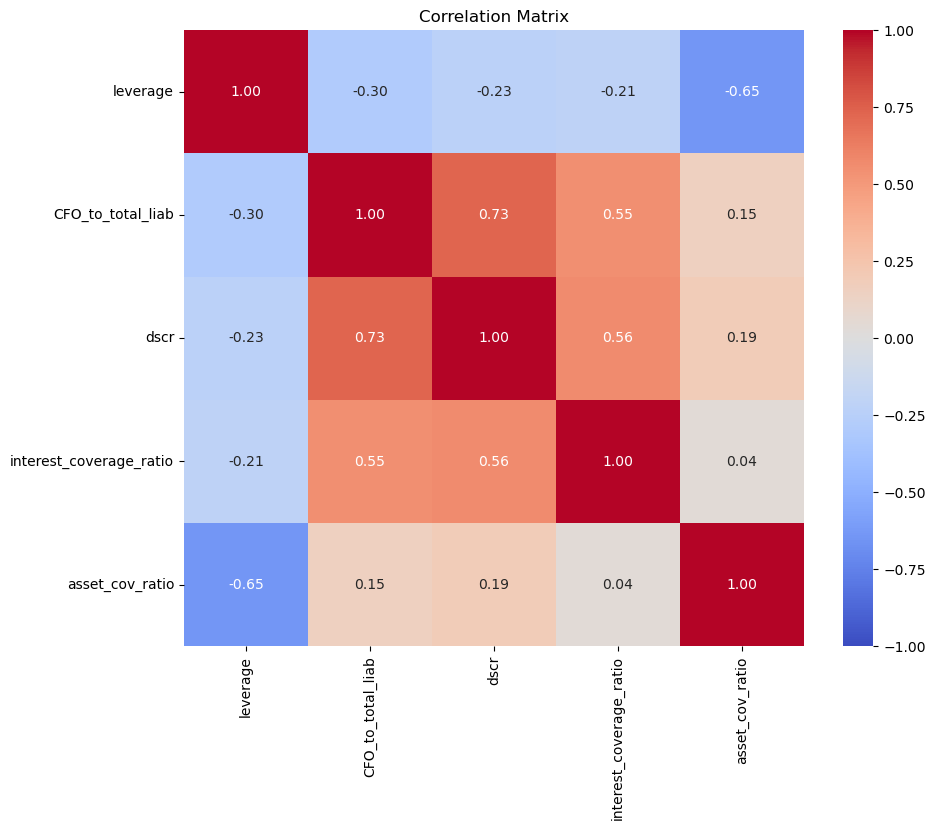

,variables,VIF
0,leverage,3.74
1,CFO_to_total_liab,4.07
2,dscr,5.72
3,interest_coverage_ratio,2.37
4,asset_cov_ratio,3.67


In [ ]:
debt_coverage_bucket=df_cleaned[['leverage', 'CFO_to_total_liab', 'dscr', 'interest_coverage_ratio', 'asset_cov_ratio']]
vif_analysis(debt_coverage_bucket)

### Profitability Ratios bucket

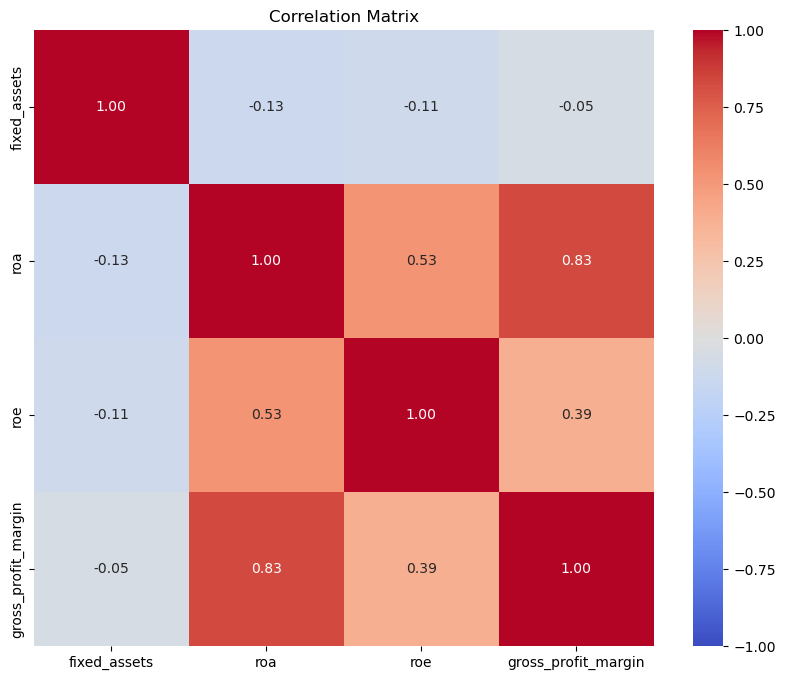

,variables,VIF
0,fixed_assets,1.37
1,roa,5.61
2,roe,1.56
3,gross_profit_margin,4.24


In [ ]:
profitability_bucket=df_cleaned[['fixed_assets','roa','roe','gross_profit_margin']]
vif_analysis(profitability_bucket)

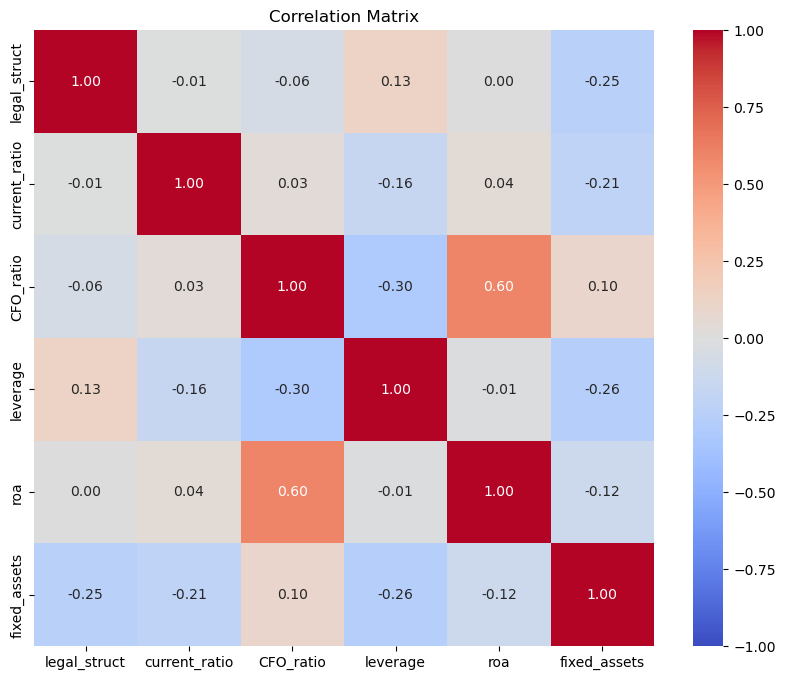

,variables,VIF
0,legal_struct,56.41
1,current_ratio,8.95
2,CFO_ratio,2.79
3,leverage,47.65
4,roa,2.77
5,fixed_assets,1.48


In [ ]:
vif_analysis(df_cleaned[target_columns])

In [43]:
target_columns=['legal_struct','current_ratio','CFO_ratio', 'leverage', 'roa','fixed_assets']

In [44]:
df_cleaned.dropna(subset=target_columns,inplace=True)

## Train Test Split



In [45]:
#split the data into train and test
train_df=df_cleaned[df_cleaned['stmt_date'].dt.year<=2011]
test_df=df_cleaned[df_cleaned['stmt_date'].dt.year>2011]

## Train the logit model

In [46]:
y_train=train_df['target']
X_train = train_df[target_columns]
y_test=test_df['target']
X_test = test_df[target_columns]

#use logit model from statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.062670
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               675272
Model:                          Logit   Df Residuals:                   675266
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Nov 2023   Pseudo R-squ.:                 0.06295
Time:                        04:40:44   Log-Likelihood:                -42320.
converged:                       True   LL-Null:                       -45162.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
legal_struct     -0.1848      0.009    -20.511      0.000      -0.202      -0.167
current_ratio    -1

### Plot ROC and CAP curve

In [47]:
#draw the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# predict probabilities
probs = result.predict(X_test)

def plot_roc_curve(y_test, probs,TITLE):
    probs=np.array(probs[:])
    y_test=np.array(y_test[:])
    filtered_preds=probs[~np.isnan(y_test)]
    target_values=y_test[~np.isnan(y_test)]

    target_values=y_test[~np.isnan(filtered_preds)]
    filtered_preds=filtered_preds[~np.isnan(filtered_preds)]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(target_values, filtered_preds)
    # calculate AUC
    auc = roc_auc_score(target_values, filtered_preds)
    plt.legend(loc="lower right", title="AUC: %.3f" % auc)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(TITLE)
    # show the plot
    plt.show()




def cap_plot(y_test, probs):
    probs=np.array(probs[:])
    y_test=np.array(y_test[:])
    # Total number of data points
    total = len(y_test)
    # Number of positive instances
    class_1_count = np.sum(y_test)
    # Number of negative instances
    class_0_count = total - class_1_count

    # Adding a baseline for random model
    plt.plot([0, total], [0, class_1_count], 'r', linestyle='--', label='Random Model')

    # Adding a baseline for perfect model
    plt.plot([0, class_1_count, total],
             [0, class_1_count, class_1_count],
             'grey', linestyle='--', label='Perfect Model')

    # Sorting the data by probability in descending order
    sorted_indices = np.argsort(probs)[::-1]
    y_test_sorted = y_test[sorted_indices]

    # Creating the CAP curve
    y_values = np.append([0], np.cumsum(y_test_sorted))
    x_values = np.arange(0, total + 1)

    # Plotting the CAP curve
    plt.plot(x_values, y_values, 'b', label='Our Model')
    plt.xlabel('Total observations')
    plt.ylabel('Defaults')
    plt.title('CAP Curve')
    plt.legend(loc='upper left')

    # Plot
    plt.show()






In [48]:
def plot_z_and_model_roc(target_values,z_values,model_values):
    probs=np.array(z_values[:])
    y_test=np.array(target_values[:])
    filtered_preds=probs[~np.isnan(y_test)]
    target_values=y_test[~np.isnan(y_test)]

    target_values=y_test[~np.isnan(filtered_preds)]
    filtered_preds=filtered_preds[~np.isnan(filtered_preds)]
    # calculate roc curve
    fpr_z, tpr_z, thresholds_z = roc_curve(target_values, filtered_preds)
    # calculate AUC
    auc_z = roc_auc_score(target_values, filtered_preds)


    probs=np.array(model_values[:])
    y_test=np.array(target_values[:])
    filtered_preds=probs[~np.isnan(y_test)]
    target_values=y_test[~np.isnan(y_test)]

    target_values=y_test[~np.isnan(filtered_preds)]
    filtered_preds=filtered_preds[~np.isnan(filtered_preds)]
    # calculate roc curve
    fpr_m, tpr_m, thresholds_m = roc_curve(target_values, filtered_preds)
    # calculate AUC
    auc_m = roc_auc_score(target_values, filtered_preds)

    plt.plot(fpr_z, tpr_z, color='blue', label=f'Z-Score (AUC = {auc_z:.3f})')
    plt.plot(fpr_m, tpr_m, color='red', label=f'Model (AUC = {auc_m:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.500)')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC curve for model and Z values")
    plt.legend(loc='lower right')
    # show the plot
    plt.show()


In [49]:
#count nans in probs
print(np.isnan(probs).sum())

0


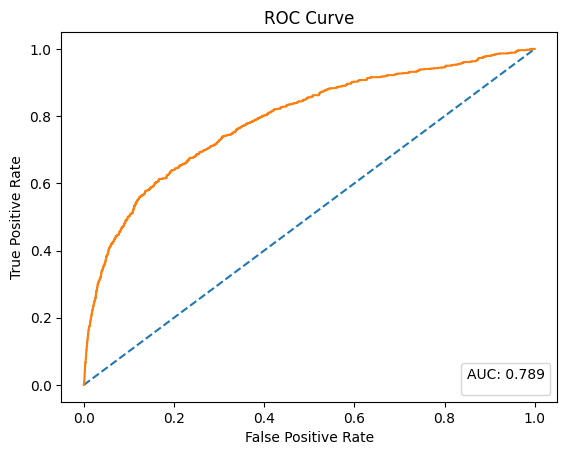

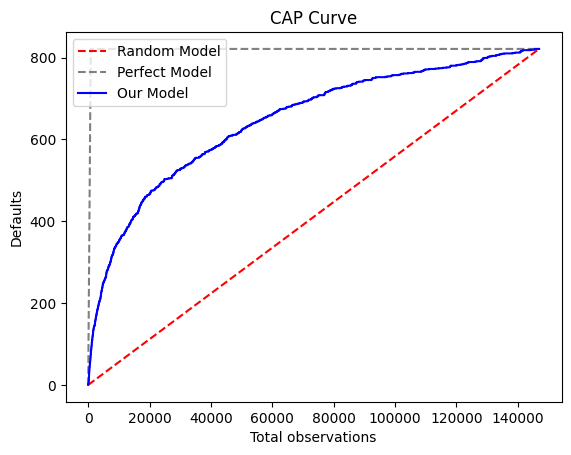

In [50]:
plot_roc_curve(y_test, probs,"ROC Curve")
cap_plot(y_test, probs)

In [51]:
y_test.value_counts()

0    146105
1       821
Name: target, dtype: int64

## Walk Forward Validation

In [52]:
def calculate_fin_ratios(df):
    #liquidity ratios
    df['current_ratio']=df['asst_current']/df['current_liab'].apply(lambda x :x+1 if x!=-1 else x+0)
    df['cash_ratio']=df['cash_and_equiv']/df['debt_st'].apply(lambda x :x+1 if x!=-1 else x+0)
    df["CFO_ratio"]=df["cf_operations"]/df["current_liab"].apply(lambda x :x+1 if x!=-1 else x+0)

    #debt coverage ratios
    df["CFO_to_total_liab"]=df["cf_operations"]/df["total_liab"].apply(lambda x :x+1 if x!=-1 else x+0)
    df['leverage']=df['total_liab']/df['asst_tot'].apply(lambda x :x+1 if x!=-1 else x+0)
    df['dscr']=df['ebitda']/df['current_liab'].apply(lambda x :x+1 if x!=-1 else x+0)
    df['interest_coverage_ratio']=df['ebitda']/df['exp_financing'].apply(lambda x :x+1 if x!=-1 else x+0)
    df['asset_cov_ratio']=(df['asst_tang_fixed']+df['asst_fixed_fin']-(df['current_liab']-df['debt_st']))/df['total_liab'].apply(lambda x :x+1 if x!=-1 else x+0)

    #profitability ratios
    df["gross_profit_margin"]=df["prof_operations"]/(df["rev_operating"].apply(lambda x :x+1 if x!=-1 else x+0))
    df['fixed_assets']=df['asst_intang_fixed']+df['asst_tang_fixed']+df['asst_fixed_fin']
    df['roa']=df['net_income']/df['asst_tot']
    df['roe'] = df['roe'].fillna(df['net_income'] / df['eqty_tot'])

    return df


In [53]:
def preprocessor(df, preproc_params = {}, new = True):
    """
    This function preprocesses the data for the model
    """
    #copy the dataframe
    new_df=df.copy()
    # check if year in stmt_date is different than in fs_year
    new_df['stmt_date'] = pd.to_datetime(new_df['stmt_date'])

    new_df['def_date'] = pd.to_datetime(new_df['def_date'])

    #target variable setup
    # based on the assumption that the company has to submit its annual report within 180 days from the end of the fiscal year
    new_df['target'] = np.where((((new_df['def_date'] - new_df['stmt_date']).dt.days <= 545) &
                    ((new_df['def_date'] - new_df['stmt_date']).dt.days >= 180)), 1, 0)

    #operation on df using COGS variable
    # new_df=new_df[new_df["COGS"]>0]
    new_df["rev_operating"]=new_df["rev_operating"].fillna(new_df["COGS"]+ new_df["prof_operations"])

    #operation on df using roa and asst_tot variable
    # new_df.dropna(subset=["roa","asst_tot"],inplace=True)
    new_df['net_income']=new_df['roa']*new_df['asst_tot']
    new_df['roe'] = new_df['roe'].fillna(new_df['net_income'] / new_df['eqty_tot'])

    new_df['current_liab']=new_df['asst_current']-new_df['wc_net']
    new_df['non_current_assets']=new_df['asst_tot']-new_df['asst_current']
    new_df["total_liab"]=new_df["asst_tot"]-new_df["eqty_tot"]
    new_df['non_current_liab']=new_df['total_liab']-new_df['current_liab']

    new_df.drop(["Unnamed: 0","HQ_city","fs_year",'eqty_corp_family_tot'],axis=1,inplace=True)

    new_df['fixed_assets']=new_df['asst_intang_fixed']+new_df['asst_tang_fixed']+new_df['asst_fixed_fin']

    # new_df = new_df[new_df['exp_financing'] > 0]

    #drop records with nulls in these columns
    if preproc_params["train"]:
        new_df.dropna(subset=["roa","asst_tot"],inplace=True)
        new_df.dropna(subset=["wc_net","asst_current"],inplace=True)
        new_df.dropna(subset=["cash_and_equiv","cf_operations"],inplace=True)
        new_df.dropna(subset=["asst_intang_fixed","asst_tang_fixed","asst_fixed_fin"],inplace=True)
        new_df.dropna(subset=["cash_and_equiv","cf_operations"],inplace=True)

    new_df['debt_lt'] = new_df['debt_lt'].fillna(new_df['total_liab']-new_df['current_liab'])
    new_df['margin_fin']=new_df['margin_fin'].fillna(new_df['eqty_tot']-new_df['fixed_assets'])

    new_df['lt_liab']=new_df['total_liab']-new_df['current_liab']

    new_df=calculate_fin_ratios(new_df)

    new_df=new_df[['stmt_date','legal_struct','asst_current', 'AR','cash_and_equiv', 'asst_tot', 'non_current_assets','eqty_tot',
              'debt_st', 'lt_liab', 'current_liab', 'total_liab','non_current_liab',
              'rev_operating', 'COGS', 'prof_operations',
              'goodwill', 'taxes', 'profit','exp_financing',
              'ebitda', 'wc_net', 'margin_fin', 'cf_operations','net_income',
              'current_ratio','cash_ratio', 'CFO_ratio',
              'CFO_to_total_liab','leverage', 'dscr', 'interest_coverage_ratio', 'asset_cov_ratio',
              'gross_profit_margin','fixed_assets','roa','roe',
              'target']]

    if not preproc_params["train"]:
        new_df=new_df[new_df[preproc_params["date_col"]]>=preproc_params["start_date"]]

    if preproc_params["train"]:
        new_df=new_df[new_df[preproc_params["date_col"]]<preproc_params["cut_off_date"]]

        new_df['legal_struct'] = new_df['legal_struct'].map({'SAU':1,'SPA':2,'SAA':3,'SRS':4,'SRL':5,'SRU':6})

        # Remove outliers for each column
        for column in new_df:
            if column == 'stmt_date':
                continue
            if column == 'target':
                continue
            if column == 'legal_struct':
                continue

            Q1 = new_df[column].quantile(0.03)
            Q3 = new_df[column].quantile(0.97)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]



        #transform the variables
        for i in target_columns:
            if i=="legal_struct":
                continue
            if i=="fixed_assets":
                continue

            temp=abs(new_df[i])**(1/3)
            #assign sign to the variable
            temp=temp*new_df[i]/abs(new_df[i])
            new_df[i]=temp

        #drop rows with null values
        new_df.dropna(inplace=True)


    else:
        new_df['legal_struct'] = new_df['legal_struct'].map({'SAU':1,'SPA':2,'SAA':3,'SRS':4,'SRL':5,'SRU':6})
        #transform the variables
        for i in target_columns:
            if i=="legal_struct":
                continue
            if i=="fixed_assets":
                continue
            temp=abs(new_df[i])**(1/3)
            #assign sign to the variable
            temp=temp*new_df[i]/abs(new_df[i])
            new_df[i]=temp

        new_df=new_df[new_df[preproc_params["date_col"]]<preproc_params["cut_off_date"]]



    return(new_df, preproc_params)

In [54]:
import statsmodels.formula.api as sm
def estimation_fun(df, est_params = {}):
    f=est_params["formula"]
    model= sm.logit(formula=f, data=df)
    logit_model_sm=model.fit()
    return(logit_model_sm)
def estimator(df, fitting_algo, est_params = {}):
    # your code here
    model=fitting_algo(df, est_params)
    return(model)


In [55]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

def estimation_fun_xgb(df, est_params={}):
    # Extract features and target from the dataframe based on the formula
    target = est_params.get("formula").split("~")[0].strip()
    features = [i.strip() for i in est_params.get("formula").split("~")[1].strip().split(" + ")]

    X = df[features]
    y = df[target]

    # Define the XGBoost model
    model = xgb.XGBClassifier()

    # Parameters for grid search
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'colsample_bytree': [0.3, 0.7]
    }

    # Setup GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X, y)

    # Return the best estimator
    return grid_search.best_estimator_


In [56]:
def predictor_xgb(new_df, model,est_params={}):
    # your code here
    target = est_params.get("formula").split("~")[0].strip()
    features = [i.strip() for i in est_params.get("formula").split("~")[1].strip().split(" + ")]

    X = new_df[features]
    # y = new_df[target]

    predictions=model.predict_proba(X)[:,-1]
    return(predictions)

In [57]:
def predictor(new_df, model, est_params = {}):
    # your code here
    predictions=model.predict(new_df)
    return(predictions)

In [58]:
def determine_calibration_bins(y_true, y_scores, n_bins=10):
    y_scores = np.array(y_scores)
    y_true = np.array(y_true)



   # Calculate the percentile for bin edges
    percentiles = np.linspace(0, 100, n_bins + 1)
    bins = np.percentile(y_scores, percentiles)

    # Ensure bins cover the entire range of scores
    bins[0] = y_scores.min()
    bins[-1] = y_scores.max()


    # Bins for the calibration curve
    bin_limits = []
    calibrated_factors = []

    # Assign equal density of observations to each bin
    for i in range(n_bins):
        bin_mask = (y_scores >= bins[i]) & (y_scores < bins[i + 1])
        bin_true = y_true[bin_mask]
        bin_limits.append((bins[i], bins[i + 1]))
        # Calculate calibrated probability for each bin
        emp_prob_bin = np.mean(bin_true) if bin_true.size > 0 else 0.0
        calibrated_factors.append(emp_prob_bin)


    plt.figure(figsize=(10, 6))
    mid_points = [bin_limits[i][-1] for i in range(n_bins)]
    plt.plot(mid_points, calibrated_factors)
    plt.xlabel('Predicted probability bins')
    plt.ylabel('Empirical probability')
    plt.title('Calibration plot')
    plt.show()

    return bin_limits, calibrated_factors

In [59]:
def apply_calibration_bins(new_scores, bin_limits, calibrated_factors):
    # Initialize calibrated_scores array with NaN
    calibrated_scores = np.full_like(new_scores, np.nan, dtype=np.float64)

    # Loop through the bin_limits and calibrated_factors to apply calibration
    for i, (lower_bound, upper_bound) in enumerate(bin_limits):
        # For the first bin, include scores less than the lower_bound
        if i == 0:
            bin_mask = (new_scores >= lower_bound) & (new_scores < upper_bound)
            lower_edge_mask = (new_scores < lower_bound)
            calibrated_scores[bin_mask] = calibrated_factors[i]
            calibrated_scores[lower_edge_mask] = calibrated_factors[i]
        # For the last bin, include scores greater than the upper_bound
        elif i == len(bin_limits) - 1:
            bin_mask = (new_scores >= lower_bound) & (new_scores <= upper_bound)
            upper_edge_mask = (new_scores > upper_bound)
            calibrated_scores[bin_mask] = calibrated_factors[i]
            calibrated_scores[upper_edge_mask] = calibrated_factors[i]
        else:
            bin_mask = (new_scores >= lower_bound) & (new_scores < upper_bound)
            calibrated_scores[bin_mask] = calibrated_factors[i]

    return calibrated_scores


In [60]:
from sklearn.calibration import CalibratedClassifierCV
def predictor_harness(new_df,train_data,model, preprocessor, predictor, preproc_params = {}, est_params = {}):
    # your code here
    df,preproc_params=preprocessor(new_df, preproc_params, new = False)
    val_df=train_data
    test_df=df
    print(df.shape)
    predictions=predictor(test_df, model, est_params)

    #calibrate the probabilities
    val_scores=predictor(val_df, model, est_params)
    val_y=val_df['target']

    bin_limits, calibrated_probs = determine_calibration_bins(val_y, val_scores, n_bins=preproc_params["n_bins"])

    #replace the predictions that are nan with 0
    #print count of nans
    print("Number of nan predictions: ",np.sum(np.isnan(predictions)))
    #print number of nans in predictions where target is 1
    print("Number of nan predictions where target is 1: ",np.sum(np.isnan(predictions[df["target"]==1])))
    predictions[np.isnan(predictions)]=0

    # new_scores: Scores from your model on new (or test) data
    plt.figure(figsize=(10, 6))
    sns.distplot(predictions, color='blue', hist=True, label='Distribution of predicted probabilities')
    # sns.distplot(val_scores, color='red', hist=True, label='Distribution of train probabilities')
    plt.title('Histogram of predicted probabilities')
    plt.show()



    calibrated_scores = apply_calibration_bins(predictions, bin_limits, calibrated_probs)
    val_calibrated_scores = apply_calibration_bins(val_scores, bin_limits, calibrated_probs)

    plt.figure(figsize=(10, 6))
    sns.distplot(calibrated_scores, color='blue', hist=True, label='Distribution of calibrated probabilities')
    plt.title('Histogram of calibrated probabilities')
    plt.show()

    return test_df,calibrated_scores,predictions

In [61]:
est_params = {"formula":"target ~ legal_struct + CFO_ratio + current_ratio  + roa + leverage + fixed_assets"} #formula for logit model

In [64]:
data=pd.read_csv("/content/gdrive/MyDrive/ML in Finance (shared)/train.csv")
preproc_params={"train":True,"date_col":"stmt_date","cut_off_date":"2012-01-01"}
train_data, preproc_params=preprocessor(data,preproc_params)
model=estimator(train_data,estimation_fun,est_params)


<ipython-input-53-80e6bd179824>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['def_date'] = pd.to_datetime(new_df['def_date'])


Optimization terminated successfully.
         Current function value: 0.059744
         Iterations 10


In [65]:
train_data.shape

(673512, 38)

In [66]:
#setting preproc_params for test data
data["stmt_date"]=pd.to_datetime(data["stmt_date"])
preproc_params["train"]=False
preproc_params["cut_off_date"]=data["stmt_date"].max()+pd.DateOffset(days=1)#added one day to capture the last record
preproc_params["start_date"]=pd.to_datetime("2012-01-01")
preproc_params["n_bins"]=300

<ipython-input-53-80e6bd179824>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['def_date'] = pd.to_datetime(new_df['def_date'])


(185639, 38)


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


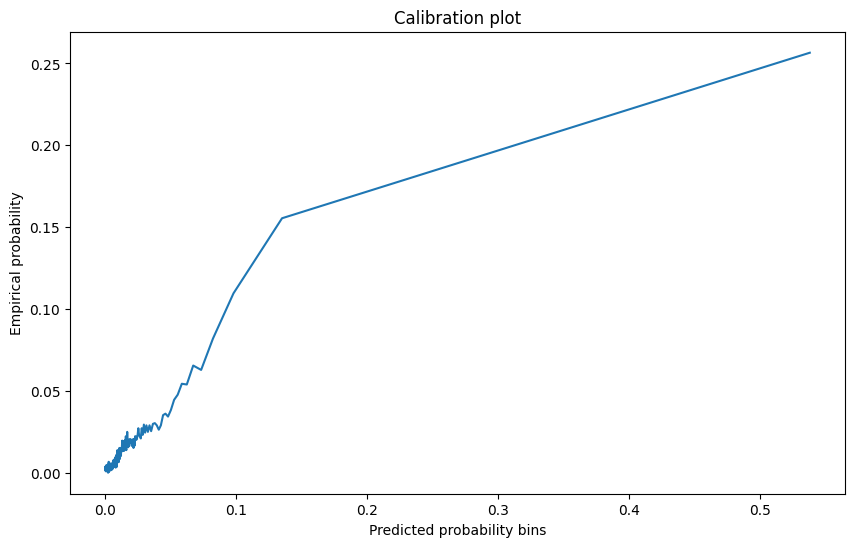

Number of nan predictions:  595
Number of nan predictions where target is 1:  8


<ipython-input-60-967a949f16e7>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, color='blue', hist=True, label='Distribution of predicted probabilities')


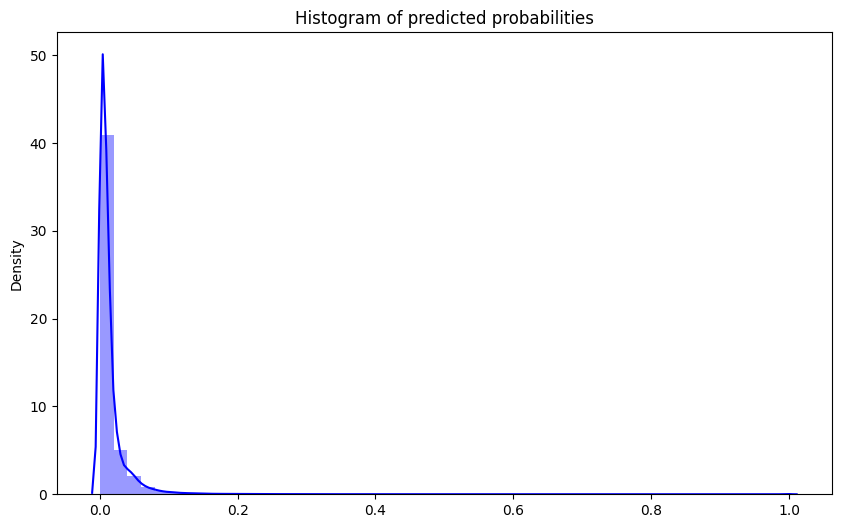

<ipython-input-60-967a949f16e7>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calibrated_scores, color='blue', hist=True, label='Distribution of calibrated probabilities')


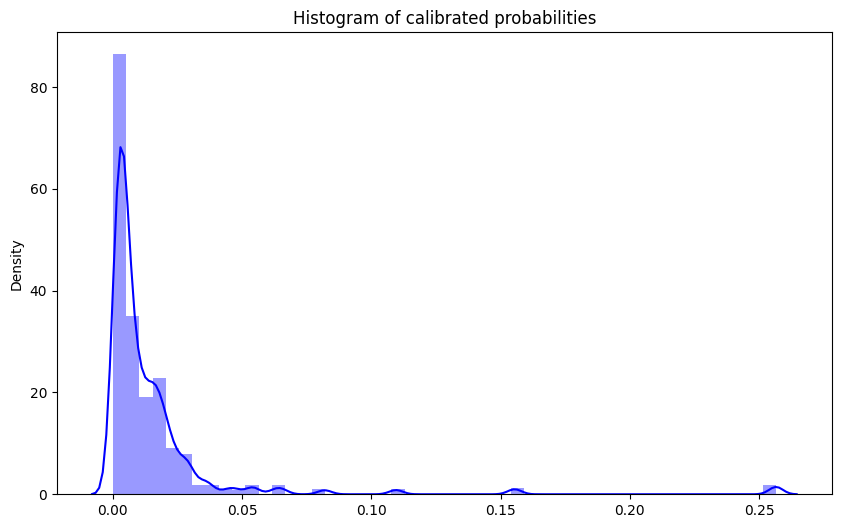

In [67]:
preds=predictor_harness(data, train_data,model, preprocessor, predictor,preproc_params,est_params)

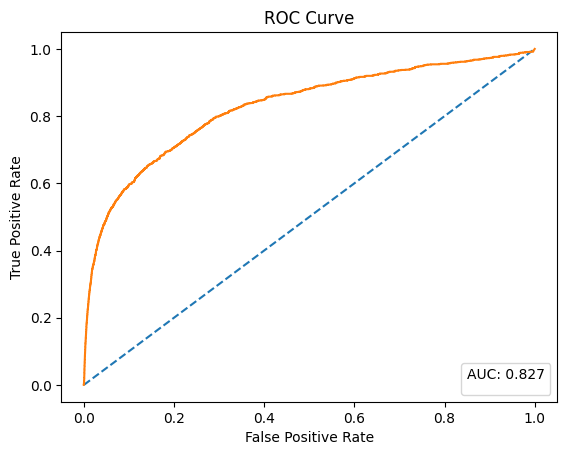

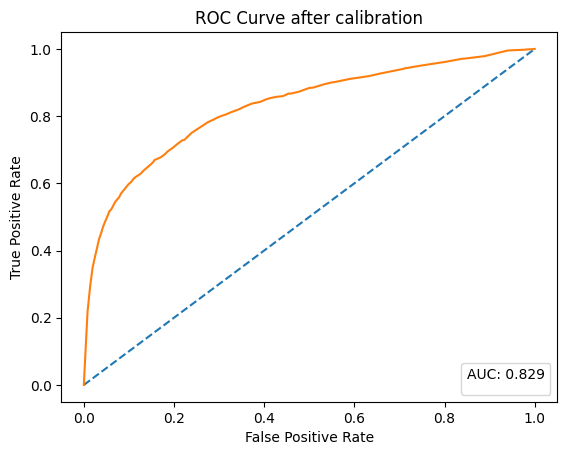

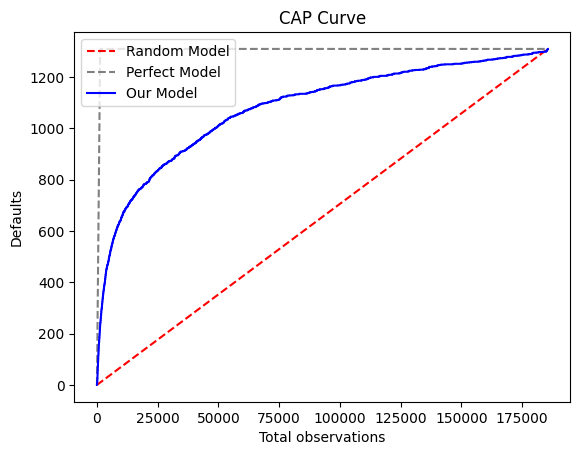

In [68]:
#get roc curve
plot_roc_curve(preds[0]['target'], preds[2], "ROC Curve")
plot_roc_curve(preds[0]['target'], preds[1], "ROC Curve after calibration")
cap_plot(preds[0]['target'], preds[2])


In [71]:
#find records in each year
data["stmt_date"].dt.year.value_counts()

2012    185639
2011    184973
2010    175399
2009    171150
2008    161863
2007    144528
Name: stmt_date, dtype: int64

In [70]:
def calculate_z_score(df):
    # Z-Score coefficients for manufacturing firms
    A = 1.2 * (df['wc_net'] / df['asst_tot'])  # Working Capital / Total Assets
    # Assuming 'retained_earnings' is part of 'eqty_tot'
    B = 1.4 * (df['eqty_tot'] / df['asst_tot'])  # Total Equity / Total Assets as a proxy for Retained Earnings / Total Assets
    C = 3.3 * (df['ebitda'] / df['asst_tot'])  # EBITDA / Total Assets
    D = 0.6 * (df['eqty_tot'] / df['total_liab'])  # Total Equity / Total Liabilities
    E = 1.0 * (df['rev_operating'] / df['asst_tot'])  # Operating Revenue / Total Assets as a proxy for Sales / Total Assets

    # Calculate the Z-Score
    z_score = A + B + C + D + E
    return z_score

In [72]:
def walk_forward_harness(df, preprocessor,estimator, predictor_harness, predictor, predictor_z,
                         start, date_col = 'stmt_date', step_size = 1):
    predictions=[]
    model_list=[]
    stats_list=[]
    target_values=[]
    caliberated_probs=[]
    z_values=[]

    df[date_col]=pd.to_datetime(df[date_col])
    start=pd.to_datetime(start)
    curr=start

    while curr <= df[date_col].max()-pd.Timedelta(days=step_size-2):
        progress_bar((curr-start).days, (df[date_col].max()-start).days, incr_txt="Step")
        #set up preproc_params for training data
        preproc_params = {"train": True, "cut_off_date": curr, "date_col": date_col}
        train_df,preproc_params=preprocessor(df, preproc_params, new = True)
        train_df["z_values"]=calculate_z_score(train_df)
        print(train_df.shape)
        print(curr)
        #set up est_params for logit model formula
        est_params = {"formula":"target ~ legal_struct + CFO_ratio + current_ratio + leverage + fixed_assets + roa"}
        est_params_z = {"formula":"target ~ z_values"}
        model=estimator(train_df, estimation_fun_xgb, est_params)
        model_z=estimator(train_df, estimation_fun, est_params_z)
        #save model summary, marginal effect summary and coefficients
        # stats_list.append({'stat_table':model.summary(), 'margeff':model.get_margeff().summary(), 'coef':model.params})
        # model_list.append(model)
        #set up preproc_params for test data
        preproc_params["train"]=False
        preproc_params["start_date"]=curr
        preproc_params["cut_off_date"]=curr+pd.Timedelta(days=step_size) #extend cut_off_date by step_size for walk forward
        preproc_params["n_bins"]=200
        test_df,calib_probs,preds=predictor_harness(df,train_df, model, preprocessor,predictor, preproc_params, est_params)
        test_df["z_values"]=calculate_z_score(test_df)
        z_preds=predictor_z(test_df, model_z, est_params_z)
        z_preds[np.isnan(z_preds)]=0
        z_values.append(z_preds)
        predictions.append(preds)
        target_values.append(test_df['target'])
        caliberated_probs.append(calib_probs)
        curr=curr+pd.Timedelta(days=step_size) #move curr forward by step_size so that we extend on training data for next iteration
    # plot_roc_curve(target_values, predictions)
    return (caliberated_probs,predictions,z_values, target_values, model_list, stats_list)


In [ ]:
caliberated_scores,predictions, z_values,target_values, model_list, stats_list = walk_forward_harness(data, preprocessor, estimator, predictor_harness, predictor_xgb,predictor,start= "2009-12-31", step_size = 366)

'[▥▥▥⇢⇢⇢⇢⇢⇢⇢]   33% (Step 366 of  1,096).'

<ipython-input-53-80e6bd179824>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['def_date'] = pd.to_datetime(new_df['def_date'])


(525001, 39)
2011-01-01 00:00:00
Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
#plot curves for each iteration
for i in range(len(predictions)):
    #merge grpahs for each iteration
    print ("Iteration: ", i+1)
    plot_z_and_model_roc(target_values[i],z_values[i],predictions[i])


In [ ]:
importance = xgb_model.get_booster().get_score(importance_type='weight')

In [ ]:
importance = xgb_model.get_booster().get_score(importance_type='gain')

In [ ]:
importance = xgb_model.get_booster().get_score(importance_type='cover')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iteration:  1


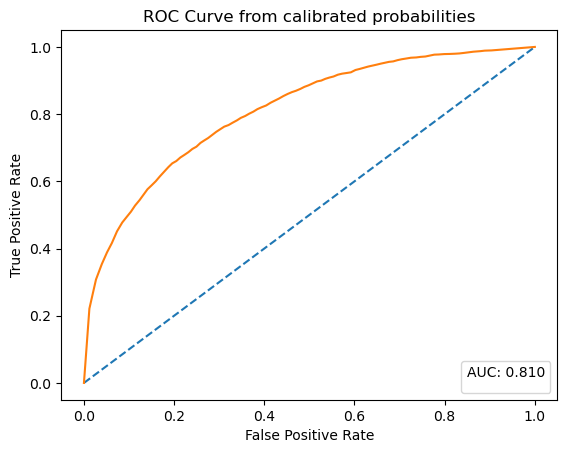

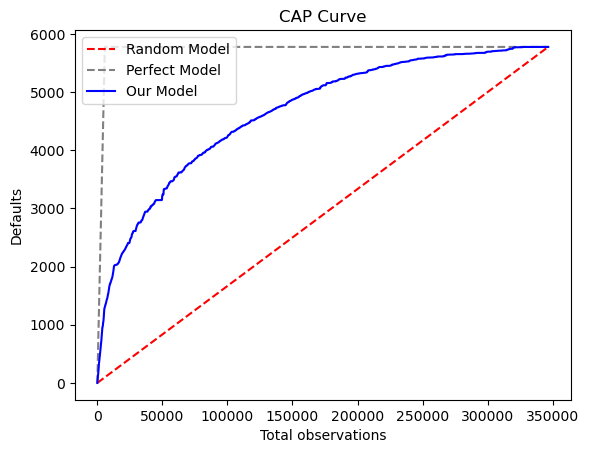

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iteration:  2


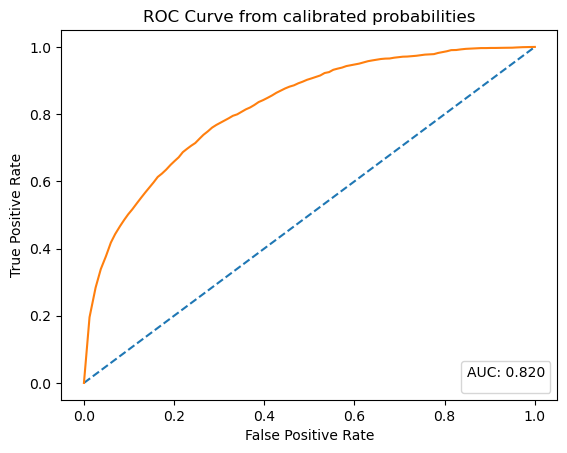

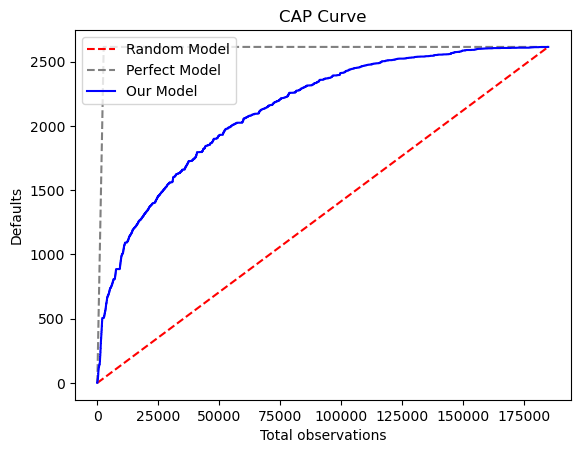

Iteration:  3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


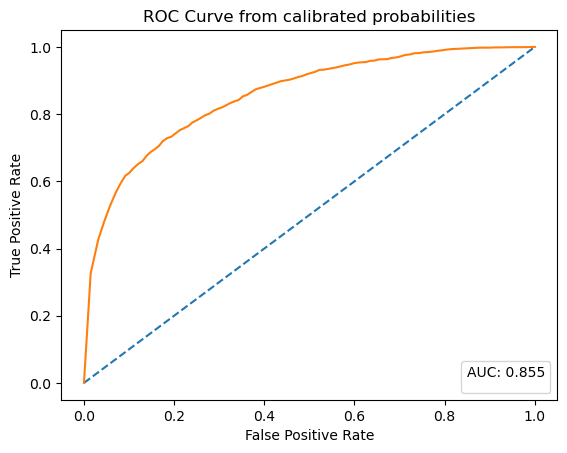

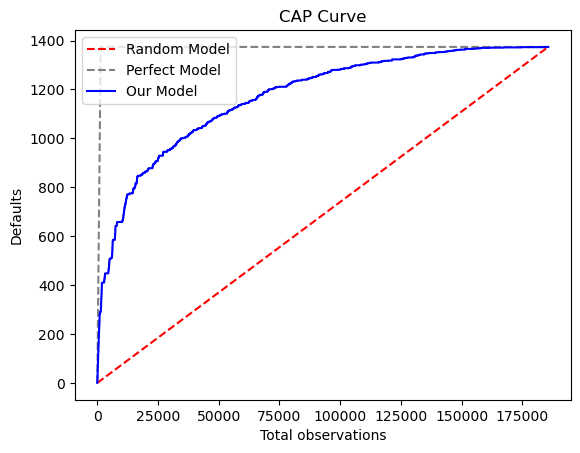

In [ ]:
#plot ROC curve for all iterations
for i in range(len(caliberated_scores)):
    #merge grpahs for each iteration
    print ("Iteration: ", i+1)
    plot_roc_curve(target_values[i], caliberated_scores[i],TITLE="ROC Curve from calibrated probabilities")
    cap_plot(target_values[i], caliberated_scores[i])

In [ ]:
#plot calibration curve
from sklearn.calibration import calibration_curve
def plot_calibration_curve(y_true, y_scores, n_bins=500):
    probs=np.array(y_scores[:])
    y_true=np.array(y_true[:])
    filtered_preds=probs[~np.isnan(y_true)]
    target_vals=y_true[~np.isnan(y_true)]

    target_vals=y_true[~np.isnan(filtered_preds)]
    filtered_preds=filtered_preds[~np.isnan(filtered_preds)]

    prob_true, prob_pred = calibration_curve(target_vals, filtered_preds, n_bins=n_bins)
    plt.plot(prob_pred, prob_true, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('Predicted Probability')
    plt.ylabel('True Probability')
    plt.legend()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


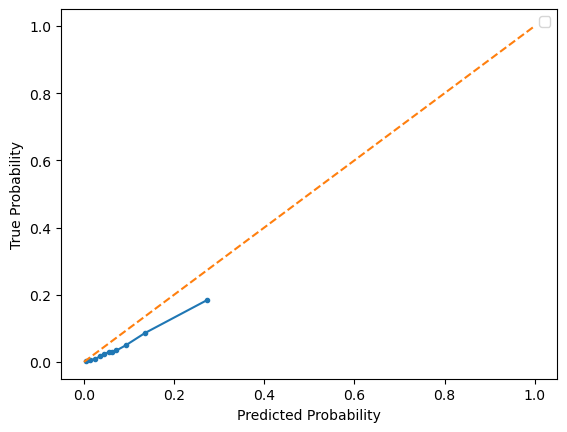

In [ ]:
plot_calibration_curve(target_values[-1], caliberated_scores[-1],n_bins=100)

/var/folders/lm/tjjq1w4j18q5433w54ry70k80000gn/T/ipykernel_40955/3888920554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(caliberated_scores[-1], color='blue', hist=True, label='Distribution of predicted probabilities')


<Axes: ylabel='Density'>

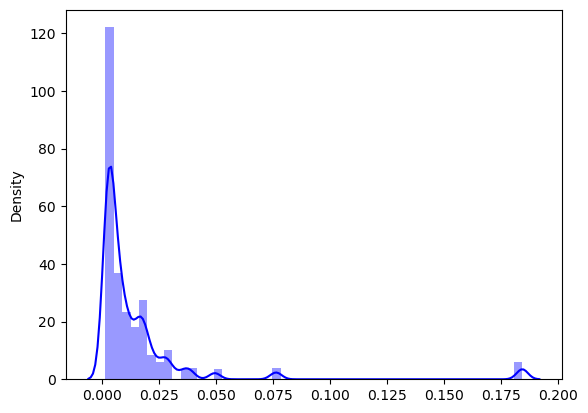

In [ ]:
sns.distplot(caliberated_scores[-1], color='blue', hist=True, label='Distribution of predicted probabilities')

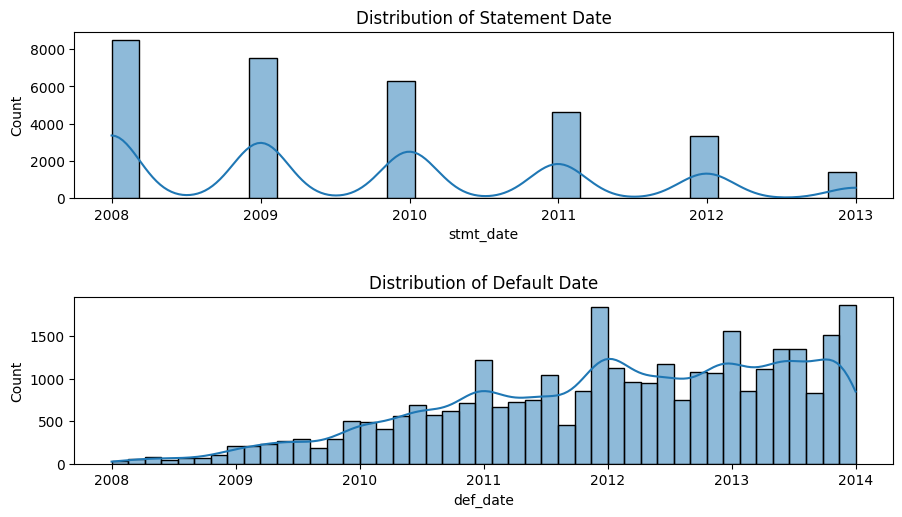

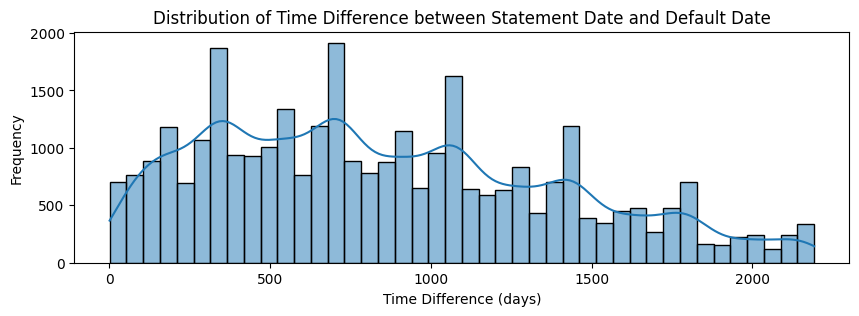

In [ ]:
z# Step 2: Investigate time-related variables

# Plot the distribution of 'stmt_date' and 'def_date'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.tight_layout(pad=5.0)

sns.histplot(data['stmt_date'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Statement Date')

sns.histplot(data['def_date'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Default Date')

plt.show()

# Calculate the time difference between 'stmt_date' and 'def_date'
data['time_diff'] = (data['def_date'] - data['stmt_date']).dt.days

# Plot the distribution of time difference
plt.figure(figsize=(10, 3))
sns.histplot(data['time_diff'], kde=True)
plt.title('Distribution of Time Difference between Statement Date and Default Date')
plt.xlabel('Time Difference (days)')
plt.ylabel('Frequency')
plt.show()


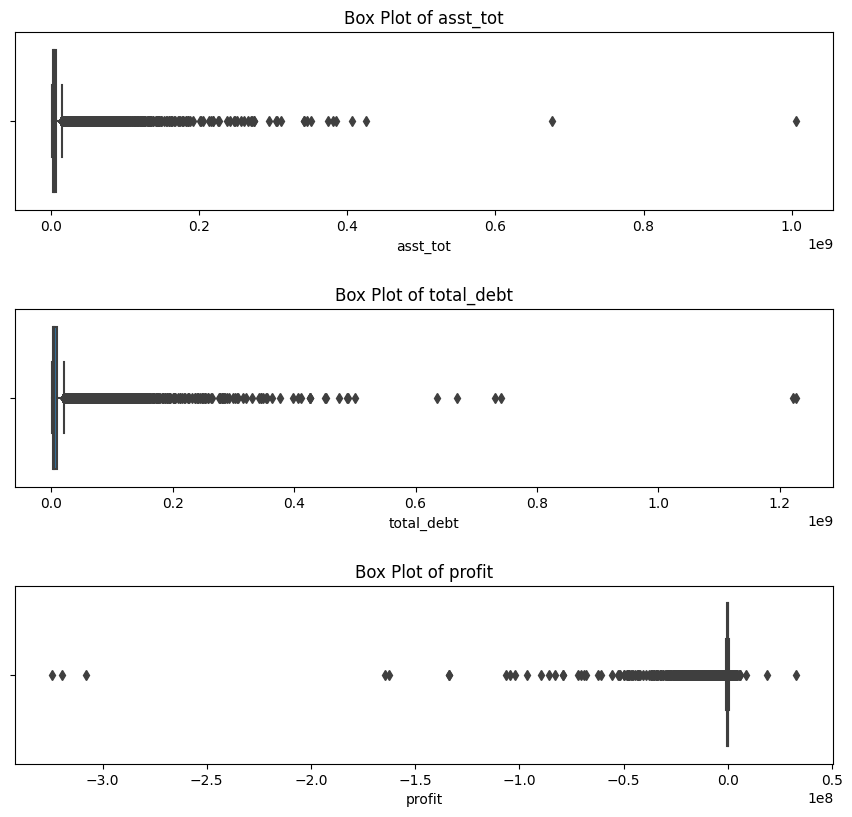

In [ ]:
# Step 3: Investigate potential outliers

# Plot box plots for key numeric variables
fig, axes = plt.subplots(nrows=len(key_numeric_vars), ncols=1, figsize=(10, len(key_numeric_vars)*3))
fig.tight_layout(pad=5.0)

for i, var in enumerate(key_numeric_vars):
    ax = axes[i] if len(key_numeric_vars) > 1 else axes
    sns.boxplot(x=var, data=data, ax=ax)
    ax.set_title(f'Box Plot of {var}')

plt.show()


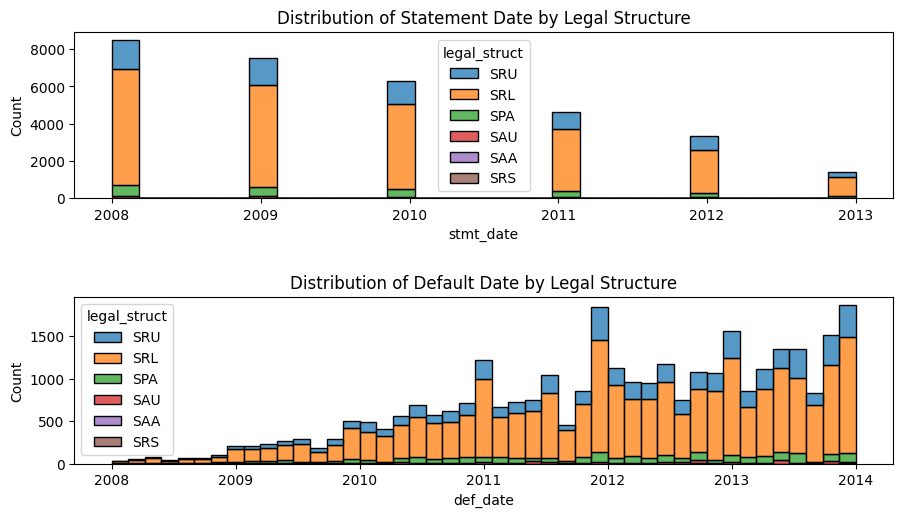

In [ ]:
# Step 1: Explore the interaction between categorical and time-related variables

# Plot the distribution of 'stmt_date' and 'def_date' for each category of 'legal_struct'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.tight_layout(pad=5.0)

sns.histplot(data=data, x='stmt_date', hue='legal_struct', multiple='stack', ax=axes[0])
axes[0].set_title('Distribution of Statement Date by Legal Structure')

sns.histplot(data=data, x='def_date', hue='legal_struct', multiple='stack', ax=axes[1])
axes[1].set_title('Distribution of Default Date by Legal Structure')

plt.show()


In [ ]:
data['stmt_year'] = data['stmt_date'].dt.year
data['stmt_month'] = data['stmt_date'].dt.month
data['def_year'] = data['def_date'].dt.year
data['def_month'] = data['def_date'].dt.month


In [ ]:
df[(df['taxes']<0)& df["net_income"]>0]

In [ ]:
data

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,asst_current,AR,cash_and_equiv,asst_tot,eqty_tot,liab_lt,liab_lt_emp,debt_bank_st,debt_bank_lt,debt_fin_st,debt_fin_lt,AP_st,AP_lt,debt_st,debt_lt,rev_operating,COGS,prof_operations,goodwill,inc_financing,exp_financing,prof_financing,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations,total_debt,leverage,asset_check,sanity_check_assets,total_ass,asset_ratio,asset_ratio_category,time_diff,stmt_year,stmt_month,def_year,def_month
957960,40230625,2007-12-31,63.0,SRU,47.0,2008-10-31,2007,962.0,109805.0,1000.0,6900903.0,5302541.0,544910.0,7012670.0,89760.0,0.0,207293.0,2011923.0,0.0,0.0,0.0,4634499.0,0.0,6693003.0,0.0,9298406.0,9360466.0,-62060.0,331495.0,-71360.0,209391.0,0.0,478.0,-132942.0,-118449.0,52.92,-52281.0,-0.88,-131.96,207900.0,-22007.0,-108670.0,8704926.0,1.241314,1.117680e+05,1,8794686.0,0.797376,0.0,305,2007,12,2008,10
957961,40750382,2007-12-31,38.0,SRU,45.0,2008-07-28,2007,10063.0,3922517.0,12955.0,4224274.0,257584.0,16783.0,8243950.0,-190757.0,33840.0,683733.0,4306254.0,1239655.0,0.0,0.0,1648455.0,0.0,6423857.0,1239655.0,12043716.0,12205175.0,-161459.0,992749.0,-611557.0,611784.0,0.0,-633.0,-773649.0,-811105.0,77.31,32139.0,-1.96,NaN,-2199583.0,NaN,-617507.0,13209421.0,1.602317,3.945536e+06,1,13018664.0,0.633241,0.0,210,2007,12,2008,7
957962,66210931,2007-12-31,93.0,SRL,68.0,2008-12-22,2007,21052.0,898791.0,0.0,1130965.0,782009.0,227.0,2053551.0,11035.0,1254.0,152009.0,706739.0,144608.0,0.0,0.0,858758.0,0.0,1725031.0,158830.0,1467688.0,1531679.0,-63991.0,510084.0,-86938.0,93002.0,0.0,-2090.0,-153019.0,-167949.0,NaN,-31374.0,-3.12,NaN,-594066.0,-908808.0,-135332.0,2735208.0,1.331941,9.198436e+05,1,2746243.0,0.747767,0.0,357,2007,12,2008,12
957963,75040931,2007-12-31,93.0,SPA,31.0,2008-11-19,2007,302565.0,1225564.0,537308.0,5088451.0,1579440.0,7600.0,7209854.0,174047.0,74924.0,695692.0,1830483.0,2804882.0,0.0,0.0,1182734.0,0.0,2547977.0,3615505.0,3951595.0,4969404.0,-1017809.0,559447.0,-391436.0,416296.0,0.0,-25740.0,-1434984.0,-1435842.0,NaN,-718172.0,-14.12,NaN,2540474.0,-1891390.0,-1136205.0,10798847.0,1.497790,2.065438e+06,1,10972894.0,0.657060,0.0,324,2007,12,2008,11
957966,93090439,2007-12-31,99.0,SRL,32.0,2008-04-09,2007,75895.0,5125845.0,6662196.0,1415520.0,1339321.0,10811.0,14888444.0,-9498390.0,1060949.0,0.0,5470306.0,5305462.0,0.0,0.0,3828852.0,0.0,14848444.0,8477210.0,8878225.0,17600384.0,-8722159.0,2961066.0,-1036524.0,957468.0,0.0,-266394.0,-10025077.0,-9598390.0,-310.60,2961066.0,-58.58,NaN,-13432924.0,NaN,2084835.0,34101422.0,2.290462,1.186394e+07,1,24603032.0,0.605147,0.0,100,2007,12,2008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013378,96026470060,2012-12-31,6.0,SPA,38.0,2013-01-14,2012,74282.0,4897839.0,2001.0,32203668.0,31708998.0,306627.0,37284111.0,-6050258.0,1890267.0,3019301.0,1115.0,1065469.0,13303150.0,0.0,9392875.0,0.0,37335155.0,1065469.0,16455316.0,25129012.0,-8673696.0,10183072.0,-59130.0,628338.0,-61200.0,-4473.0,-8798499.0,-9223954.0,NaN,-269707.0,-23.26,NaN,-5131487.0,NaN,-819965.0,52770358.0,1.415358,4.974123e+06,1,46720100.0,0.798031,0.0,14,2012,12,2013,1
1013379,96026470060,2009-12-31,6.0,SPA,38.0,2013-01-14,2009,26377.0,6213759.0,93575.0,12847585.0,12624754.0,6703.0,19227503.0,3507910.0,244042.0,3141364.0,1831055.0,2263123.0,3130324.0,0.0,3112150.0,0.0,10056902.0,2263123.0,14809906.0,15865954.0,-1056048.0,9462607.0,-213784.0,213897.0,0.0,-12845.0,-1282677.0,-1584758.0,-137.11,660337.0,-5.49,-45.18,2790683.0,-2825801.0,131627.0,19544527.0,1.016488,6.333712e+06,1,23052437.0,0.834077,0.0,1110,2009,12,2013,1
1013380,96026470060,2008-12-31,6.0,SPA,38.0,2013-01-14,2008,36937.0,7186542.0,117778.0,8342601.0,8103397.0,9558.0,15749504.0,1092676.0,320000.0,3211774.0,538151

In [ ]:
data['stmt_year'].value_counts()

2007    8511
2008    7513
2009    6317
2010    4650
2011    3343
2012    1432
Name: stmt_year, dtype: int64

In [ ]:
data['stmt_year'].describe(), data['stmt_year'].head()


(count    31766.000000
 mean      2008.719732
 std          1.484181
 min       2007.000000
 25%       2007.000000
 50%       2008.000000
 75%       2010.000000
 max       2012.000000
 Name: stmt_year, dtype: float64,
 957960    2007
 957961    2007
 957962    2007
 957963    2007
 957966    2007
 Name: stmt_year, dtype: int64)

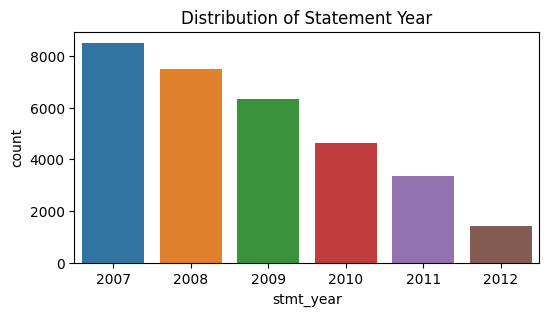

In [ ]:
# Reset index before plotting
fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(x=data['stmt_year'].reset_index(drop=True), ax=ax)
ax.set_title('Distribution of Statement Year')
plt.show()


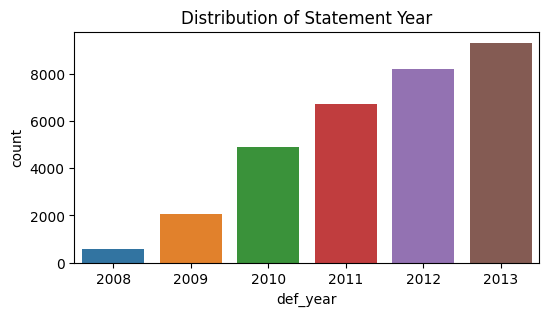

In [ ]:
# Reset index before plotting
fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(x=data['def_year'].reset_index(drop=True), ax=ax)
ax.set_title('Distribution of Statement Year')
plt.show()


In [ ]:
data.columns

Index(['id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector',
       'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed',
       'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot',
       'eqty_tot', 'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt',
       'debt_fin_st', 'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt',
       'rev_operating', 'COGS', 'prof_operations', 'goodwill', 'inc_financing',
       'exp_financing', 'prof_financing', 'inc_extraord', 'taxes', 'profit',
       'days_rec', 'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin',
       'cf_operations', 'total_debt', 'leverage', 'asset_check',
       'sanity_check_assets', 'total_ass', 'asset_ratio',
       'asset_ratio_category', 'time_diff', 'stmt_year', 'stmt_month',
       'def_year', 'def_month'],
      dtype='object')

In [ ]:
data['asst_tang_ratio'] = data['asst_tang_fixed'] / data['asst_tot']
data['debt_equity_ratio'] = data['total_debt'] / data['eqty_tot']
data['profit_margin'] = data['profit'] / data['rev_operating']

In [ ]:
data.columns

Index(['id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector',
       'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed',
       'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot',
       'eqty_tot', 'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt',
       'debt_fin_st', 'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt',
       'rev_operating', 'COGS', 'prof_operations', 'goodwill', 'inc_financing',
       'exp_financing', 'prof_financing', 'inc_extraord', 'taxes', 'profit',
       'days_rec', 'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin',
       'cf_operations', 'total_debt', 'leverage', 'asset_check',
       'sanity_check_assets', 'total_ass', 'asset_ratio',
       'asset_ratio_category', 'time_diff', 'stmt_year', 'stmt_month',
       'def_year', 'def_month', 'asst_tang_ratio', 'debt_equity_ratio',
       'profit_margin'],
      dtype='object')

In [ ]:
# Step 1: Investigate patterns or trends in new features

# Plot the distribution of new features
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 9))
fig.tight_layout(pad=5.0)

sns.histplot(data['asst_tang_ratio'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Asset Tangibility Ratio')

sns.histplot(data['debt_equity_ratio'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Debt Equity Ratio')

sns.histplot(data['profit_margin'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Profit Margin')

plt.show()


In [ ]:
# Step 2: Analyze the relationship between new features and key variables

# Select some key numeric variables for analysis
key_numeric_vars = ['asst_tot', 'total_debt', 'profit']

# Plot the relationship between 'asst_tang_ratio' and key numeric variables
fig, axes = plt.subplots(nrows=len(key_numeric_vars), ncols=1, figsize=(10, len(key_numeric_vars)*3))
fig.tight_layout(pad=5.0)

for i, var in enumerate(key_numeric_vars):
    ax = axes[i] if len(key_numeric_vars) > 1 else axes
    sns.scatterplot(x='asst_tang_ratio', y=var, data=data, ax=ax)
    ax.set_title(f'Asset Tangibility Ratio vs {var}')

plt.show()


In [ ]:
# Step 3: Explore the interaction between categorical and new features

# Plot the mean of new features within each category of 'legal_struct'
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 9))
fig.tight_layout(pad=5.0)

sns.barplot(x='legal_struct', y='asst_tang_ratio', data=data, ax=axes[0], ci='sd')
axes[0].set_title('Mean Asset Tangibility Ratio by Legal Structure')

sns.barplot(x='legal_struct', y='debt_equity_ratio', data=data, ax=axes[1], ci='sd')
axes[1].set_title('Mean Debt Equity Ratio by Legal Structure')

sns.barplot(x='legal_struct', y='profit_margin', data=data, ax=axes[2], ci='sd')
axes[2].set_title('Mean Profit Margin by Legal Structure')

plt.show()


In [74]:
from IPython.display import clear_output, display
def progress_bar(k, n, incr_txt="Step", bar_len = 10):

    bar_char  = u'\u25A5'
    line_char = u'\u21E2' # u'\u2192'  u'\u23AF' u'\u25AD'

    places   = int(np.ceil(n/bar_len))
    pct      = k/n
    n_str    = "{:,.0f}".format(n)
    k_str    = "{:,.0f}".format(k)
    pct_str  = "{:,.0f}%".format(k/n * 100)
    # d_format = "%" + str(places) + "d"

    if k == n-1:
        n_bars = bar_len
        n_spaces = 0
        text_txt = "Completed " + n_str + " " + incr_txt + "s."
    else:
        n_bars   = int(np.floor(pct * bar_len))
        n_spaces = bar_len - n_bars
        text_txt = " " + pct_str +  " (" + incr_txt + " " + k_str + " of  " + n_str + ")."

    bar_txt  = "[" + "".ljust(n_bars,bar_char) + "".rjust(n_spaces,line_char) + "]  "

    clear_output()
    display(bar_txt + text_txt)

In [ ]:
import numpy as np
from numpy.linalg import inv
from scipy.stats import multivariate_normal

# Data provided in the question
data = np.array([
    [1.5, 20, 8, 110, 12],
    [2.3, 15, 12, 94, 21],
    [0.8, 18, 6, 152, 9],
    [1.2, 19, 10, 123, 14],
    [2.0, 17, 17, 78, 19],
    [1.2, 22, 12, 60, 15],
    [0.7, 21, 9, 111, 7],
    [2.7, 14, 14, 83, 29],
    [2.3, 17, 10, 85, 22],
    [0.6, 22, 8, 90, 15]
])

# Means of the features
means = np.mean(data, axis=0)

# Covariance matrix of the features
covariance_matrix = np.cov(data.T)

# Given values for the features other than fruit weight
given_features = np.array([15, 20, 120, 8])

mean_Y = means[0] #mean of fruit weight
mean_X = means[1:] #mean of other features

cov_YY = covariance_matrix[0, 0] #covariance of fruit weight
cov_YX = covariance_matrix[0, 1:] #covariance of fruit weight with other features
cov_XY = covariance_matrix[1:, 0] #transpose of cov_YX
cov_XX = covariance_matrix[1:, 1:] #covariance of other features

# Calculate the conditional mean and variance
conditional_mean = mean_Y + cov_YX @ inv(cov_XX) @ (given_features - mean_X) # using eq 5.131 in lecture notes
conditional_variance = cov_YY - cov_YX @ inv(cov_XX) @ cov_XY # using eq 5.132 in lecture notes

# Print the conditional mean and variance
conditional_mean, conditional_variance

print(" For the given values of the features, the conditional mean of fruit weight is {:.2f} and the conditional variance is {:.2f}.".format(conditional_mean, conditional_variance))
print("Thus the conditional pdf is given by the following equation:")
print("f(Y|X) = N({:.2f}, {:.2f})".format(conditional_mean, conditional_variance))


 For the given values of the features, the conditional mean of fruit weight is 1.77 and the conditional variance is 0.04.
Thus the conditional pdf is given by the following equation:
f(Y|X) = N(1.77, 0.04)
